# Phi->ee ML analysis

In this version we use official ALICE Phi simulations and the data sidebands

## Using ALICE data 

Keys in the ROOT file: ['DF_2336518081368096;1', 'DF_2336518081368096/O2tree;1']
Branches in the tree: ['fPX1', 'fPY1', 'fPZ1', 'fPE1', 'fPX2', 'fPY2', 'fPZ2', 'fPE2', 'fNCOUNTERPV', 'fNELECTRONSTOF']
       fPX1      fPY1      fPZ1      fPE1      fPX2      fPY2      fPZ2  \
0  0.380054 -0.298258  0.218900  0.530393 -0.394773  0.303569 -0.138682   
1 -0.006880  0.306499 -0.018638  0.307143  0.006890 -0.327766 -0.282457   
2 -0.074406 -0.541143 -0.165148  0.570654  0.046732  0.467763  0.282230   
3 -0.490760 -0.127637 -0.275347  0.577020  0.477005  0.131425 -0.227821   
4  0.031068  0.373844 -0.298184  0.479206 -0.021104 -0.371243  0.111860   

       fPE2  fNCOUNTERPV  fNELECTRONSTOF  
0  0.516946            2               0  
1  0.432736            2               0  
2  0.548307            2               1  
3  0.544710            2               0  
4  0.388304            2               0  

DataFrame for fNELECTRONSTOF = 0:
       fPX1      fPY1      fPZ1      fPE1      fPX2    

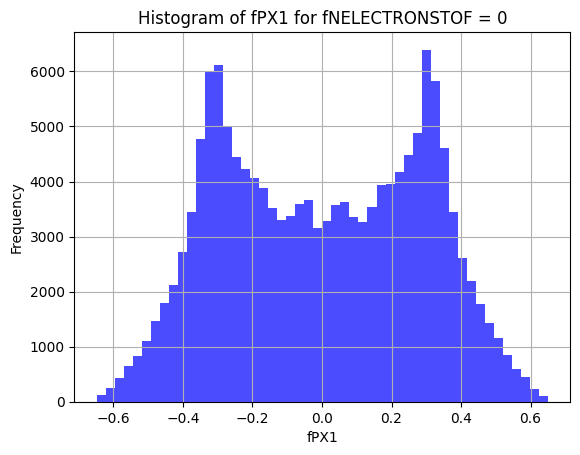

In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt

# Path to the ROOT file
root_file_path = "AO2D.root"

# Open the ROOT file
file = uproot.open(root_file_path)

# List all the keys (trees, histograms, etc.) in the file
print("Keys in the ROOT file:", file.keys())

# Access a specific tree by its name
tree_name = "DF_2336518081368096/O2tree"  # Replace with your tree name
tree = file[tree_name]

# Print the list of branches in the tree
print("Branches in the tree:", tree.keys())

# Convert the tree into a Pandas DataFrame for easy manipulation
branches_to_load = [
    "fPX1", "fPY1", "fPZ1", "fPE1",
    "fPX2", "fPY2", "fPZ2", "fPE2",
    "fNCOUNTERPV", "fNELECTRONSTOF"
]
df = tree.arrays(branches_to_load, library="pd")

# Display the first few rows of the DataFrame
print(df.head())

# Split the DataFrame into three based on the value of fNELECTRONSTOF
df_original = {}
for tof_value in [0, 1, 2]:
    df_subset = df[df["fNELECTRONSTOF"] == tof_value].copy()
    df_subset.drop(columns=["fNELECTRONSTOF"], inplace=True)  # Remove fNELECTRONSTOF column
    df_original[tof_value] = df_subset

# Verify the resulting DataFrames
for tof_value, subset_df in df_original.items():
    print(f"\nDataFrame for fNELECTRONSTOF = {tof_value}:")
    print(subset_df.head())

# Example: Plot a histogram of fPX1 for fNELECTRONSTOF = 0
branch_to_plot = "fPX1"
plt.hist(df_original[0][branch_to_plot], bins=50, color="blue", alpha=0.7)
plt.xlabel(branch_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {branch_to_plot} for fNELECTRONSTOF = 0")
plt.grid(True)
plt.show()


In [2]:
df.head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,fNELECTRONSTOF
0,0.380054,-0.298258,0.218900,0.530393,-0.394773,0.303569,-0.138682,0.516946,2,0
1,-0.006880,0.306499,-0.018638,0.307143,0.006890,-0.327766,-0.282457,0.432736,2,0
2,-0.074406,-0.541143,-0.165148,0.570654,0.046732,0.467763,0.282230,0.548307,2,1
3,-0.490760,-0.127637,-0.275347,0.577020,0.477005,0.131425,-0.227821,0.544710,2,0
4,0.031068,0.373844,-0.298184,0.479206,-0.021104,-0.371243,0.111860,0.388304,2,0


Keys in the ROOT file: ['DF_2336986300000000;1', 'DF_2336986300000000/O2tree;1', 'parentFiles;1']
Branches in the tree: ['fPX1', 'fPY1', 'fPZ1', 'fPE1', 'fPX2', 'fPY2', 'fPZ2', 'fPE2', 'fNCOUNTERPV', 'fNELECTRONSTOF']
       fPX1      fPY1      fPZ1      fPE1      fPX2      fPY2      fPZ2  \
0 -0.210378  0.425909 -0.296664  0.560060  0.205787 -0.445194 -0.344597   
1 -0.206298 -0.476324  0.260467  0.580764  0.179176  0.378058  0.220541   
2 -0.245526  0.461652  0.436331  0.681022  0.185592 -0.454489  0.211483   
3  0.064800 -0.352508 -0.295921  0.464790  0.076093  0.570262 -0.424104   
4  0.186235 -0.330906 -0.313627  0.492487 -0.250167  0.462689 -0.339875   

       fPE2  fNCOUNTERPV  fNELECTRONSTOF  
0  0.599411            2               0  
1  0.472938            2               0  
2  0.534537            2               1  
3  0.714740            2               0  
4  0.626242            2               1  

DataFrame for fNELECTRONSTOF = 0:
        fPX1      fPY1      fPZ1      

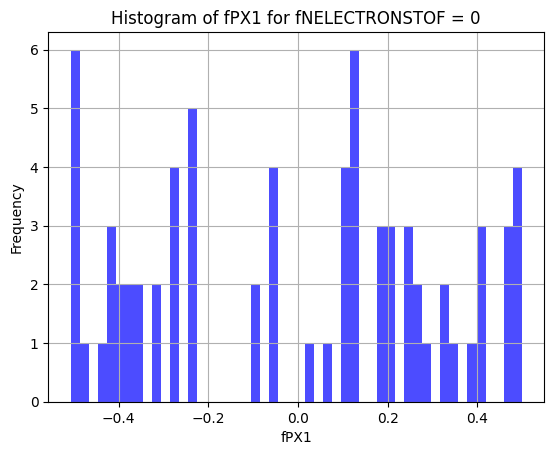

In [3]:
# Path to the ROOT file
root_file_path_mc = "AO2D_phi_DG.root"

# Open the ROOT file
file_mc = uproot.open(root_file_path_mc)

# List all the keys (trees, histograms, etc.) in the file
print("Keys in the ROOT file:", file_mc.keys())

# Access a specific tree by its name
tree_name_mc = "DF_2336986300000000/O2tree"  # Replace with your tree name
tree_mc = file_mc[tree_name_mc]

# Print the list of branches in the tree
print("Branches in the tree:", tree_mc.keys())

# Convert the tree into a Pandas DataFrame for easy manipulation
branches_to_load_mc = [
    "fPX1", "fPY1", "fPZ1", "fPE1",
    "fPX2", "fPY2", "fPZ2", "fPE2",
    "fNCOUNTERPV", "fNELECTRONSTOF"
]
df_mc = tree_mc.arrays(branches_to_load_mc, library="pd")

# Display the first few rows of the DataFrame
print(df_mc.head())

# Split the DataFrame into three based on the value of fNELECTRONSTOF
df_original_mc = {}
for tof_value in [0, 1, 2]:
    df_subset_mc = df_mc[df_mc["fNELECTRONSTOF"] == tof_value].copy()
    df_subset_mc.drop(columns=["fNELECTRONSTOF"], inplace=True)  # Remove fNELECTRONSTOF column
    df_original_mc[tof_value] = df_subset_mc

# Verify the resulting DataFrames
for tof_value, subset_df in df_original_mc.items():
    print(f"\nDataFrame for fNELECTRONSTOF = {tof_value}:")
    print(subset_df.head())

# Example: Plot a histogram of fPX1 for fNELECTRONSTOF = 0
branch_to_plot = "fPX1"
plt.hist(df_original_mc[2][branch_to_plot], bins=50, color="blue", alpha=0.7)
plt.xlabel(branch_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {branch_to_plot} for fNELECTRONSTOF = 0")
plt.grid(True)
plt.show()


In [4]:
df_mc

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,fNELECTRONSTOF
0,-0.210378,0.425909,-0.296664,0.560060,0.205787,-0.445194,-0.344597,0.599411,2,0
1,-0.206298,-0.476324,0.260467,0.580764,0.179176,0.378058,0.220541,0.472938,2,0
2,-0.245526,0.461652,0.436331,0.681022,0.185592,-0.454489,0.211483,0.534537,2,1
3,0.064800,-0.352508,-0.295921,0.464790,0.076093,0.570262,-0.424104,0.714740,2,0
4,0.186235,-0.330906,-0.313627,0.492487,-0.250167,0.462689,-0.339875,0.626242,2,1
...,...,...,...,...,...,...,...,...,...,...
800,-0.456713,-0.043626,0.236361,0.516098,0.503640,0.031625,0.326444,0.601015,2,1
801,0.064962,0.461507,-0.347750,0.581497,-0.044626,-0.396183,0.162348,0.430476,2,1
802,0.270839,-0.424526,-0.269931,0.571348,-0.312763,0.415311,-0.343745,0.623270,2,0
803,0.223725,-0.394548,-0.370604,0.585721,-0.244489,0.453923,-0.333400,0.613984,2,1


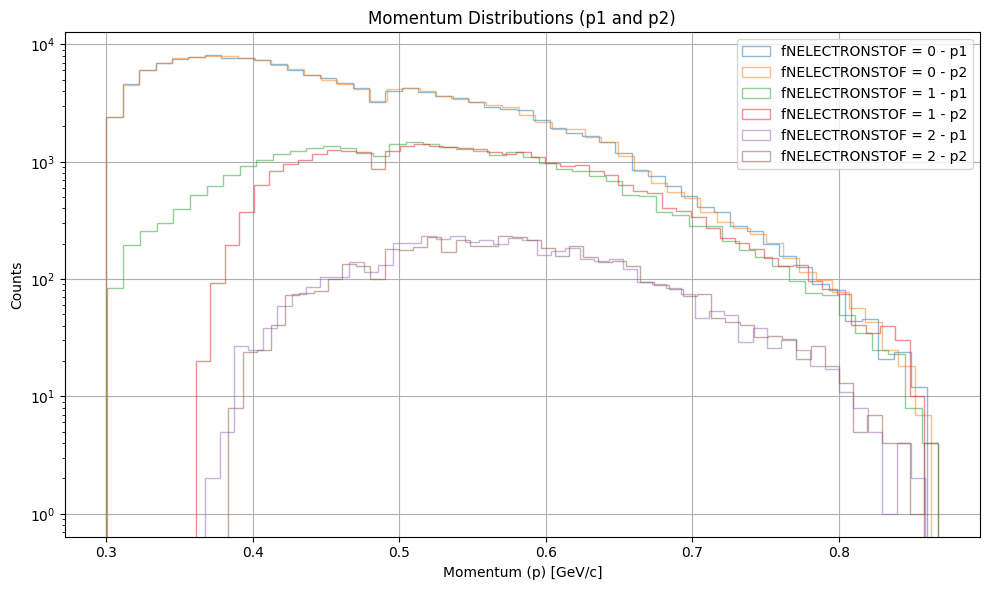

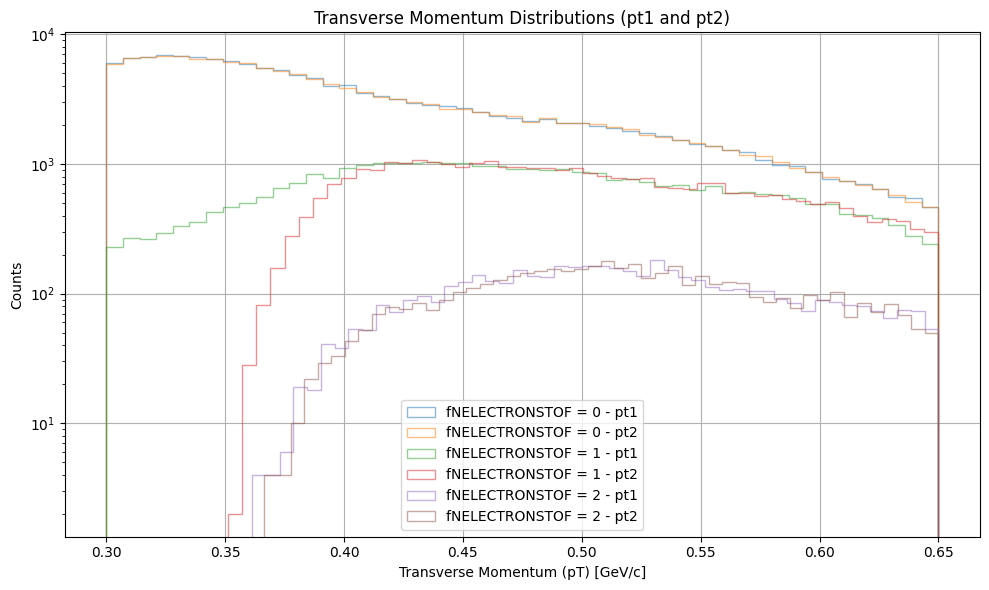

In [5]:
import numpy as np

def add_individual_momenta(dataframes):
    """
    Adds p1, p2, pt1, and pt2 columns to each DataFrame for individual tracks.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    """
    for tof_value, df in dataframes.items():
        # Calculate momentum (p) and transverse momentum (pt) for individual tracks
        df["p1"] = np.sqrt(df["fPX1"]**2 + df["fPY1"]**2 + df["fPZ1"]**2)
        df["p2"] = np.sqrt(df["fPX2"]**2 + df["fPY2"]**2 + df["fPZ2"]**2)
        df["pt1"] = np.sqrt(df["fPX1"]**2 + df["fPY1"]**2)
        df["pt2"] = np.sqrt(df["fPX2"]**2 + df["fPY2"]**2)

def plot_individual_momenta(dataframes):
    """
    Plots p1 and p2, pt1 and pt2 on separate plots for the given DataFrames.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    """
    # Plot p1 and p2
    plt.figure(figsize=(10, 6))
    for tof_value, df in dataframes.items():
        plt.hist(df["p1"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - p1", histtype="step")
        plt.hist(df["p2"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - p2", histtype="step")
    plt.yscale("log")
    plt.xlabel("Momentum (p) [GeV/c]")
    plt.ylabel("Counts")
    plt.title("Momentum Distributions (p1 and p2)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot pt1 and pt2
    plt.figure(figsize=(10, 6))
    for tof_value, df in dataframes.items():
        plt.hist(df["pt1"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - pt1", histtype="step")
        plt.hist(df["pt2"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - pt2", histtype="step")
    plt.yscale("log")
    plt.xlabel("Transverse Momentum (pT) [GeV/c]")
    plt.ylabel("Counts")
    plt.title("Transverse Momentum Distributions (pt1 and pt2)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Add p1, p2, pt1, and pt2 to the DataFrames
add_individual_momenta(df_original)

# Plot the individual momentum distributions
plot_individual_momenta(df_original)


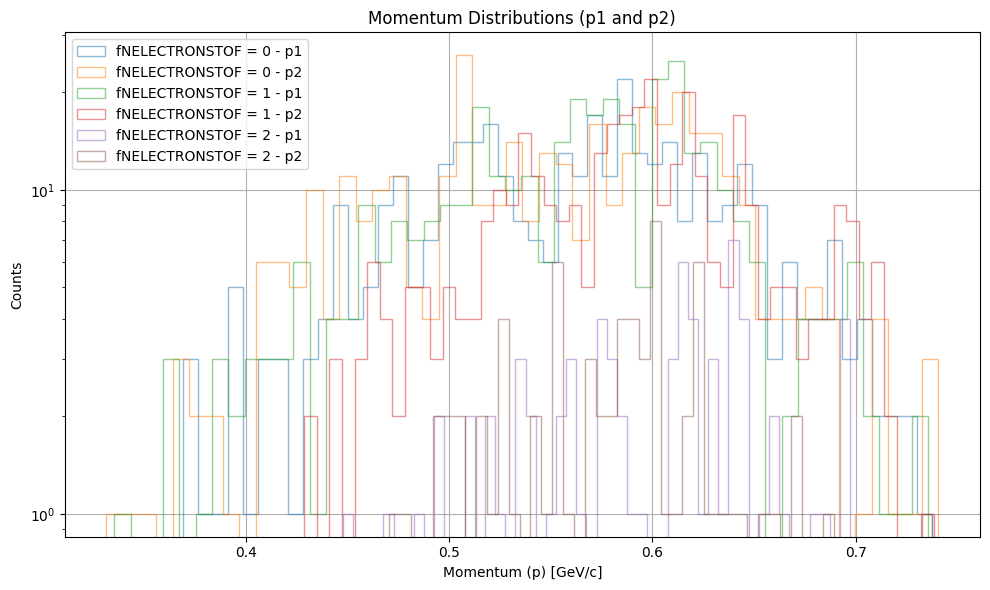

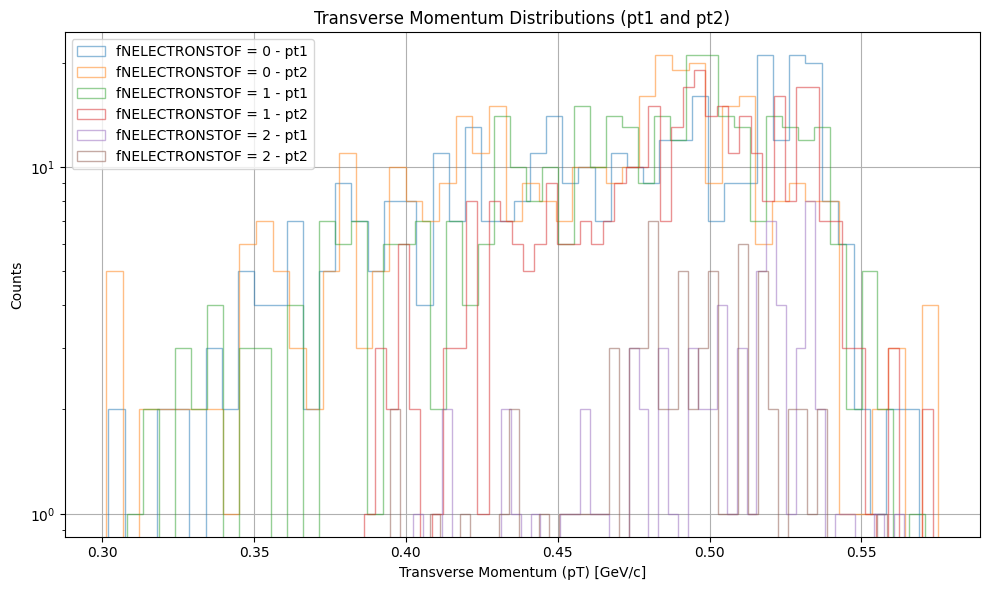

In [6]:
# Add p1, p2, pt1, and pt2 to the DataFrames
add_individual_momenta(df_original_mc)

# Plot the individual momentum distributions
plot_individual_momenta(df_original_mc)


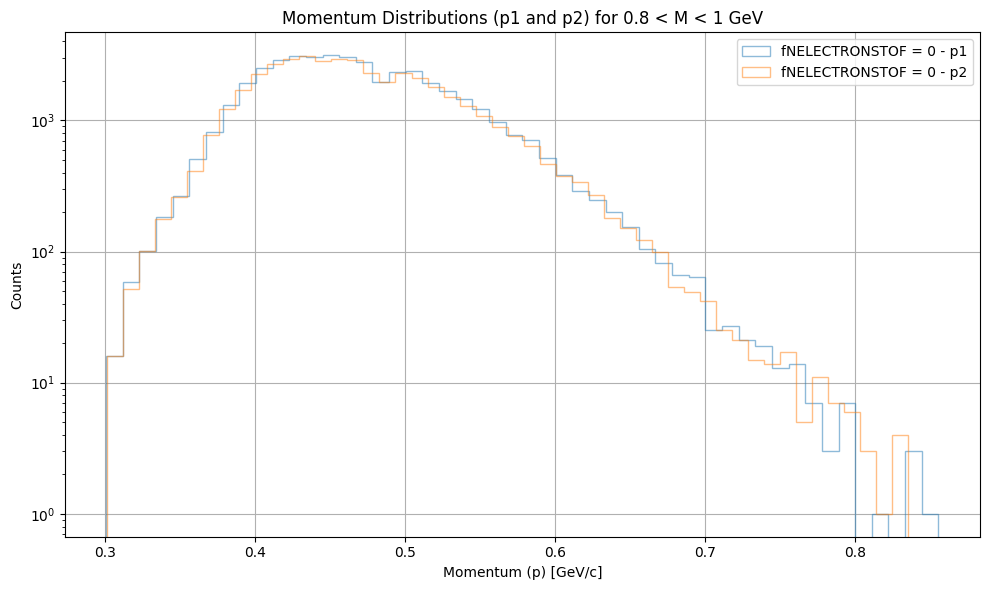

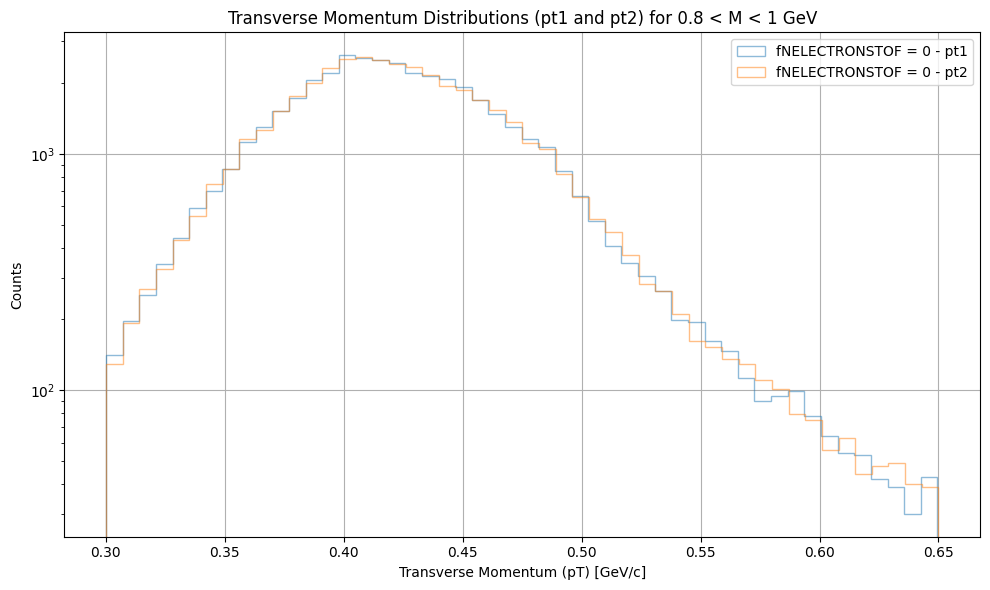

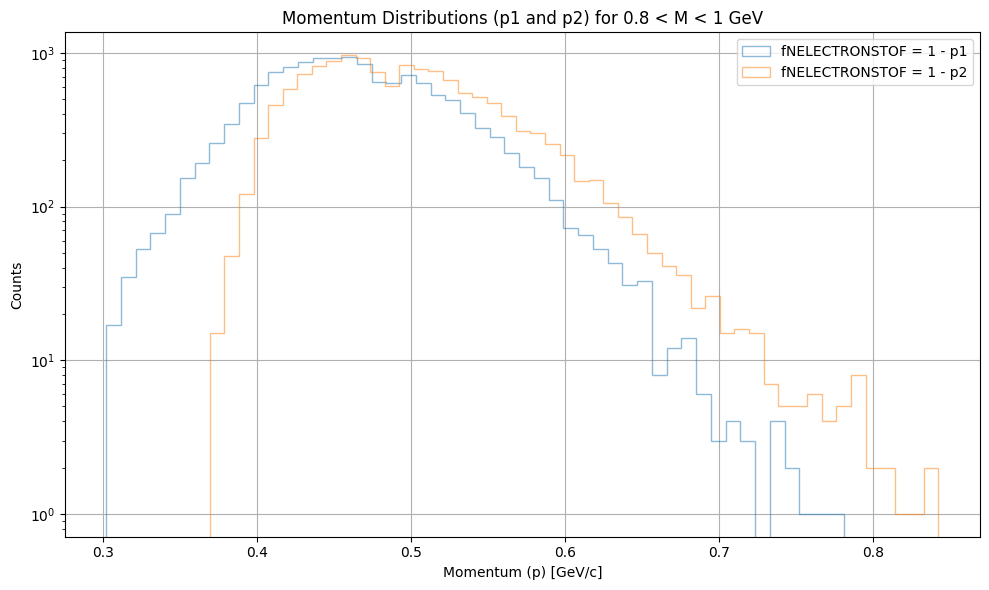

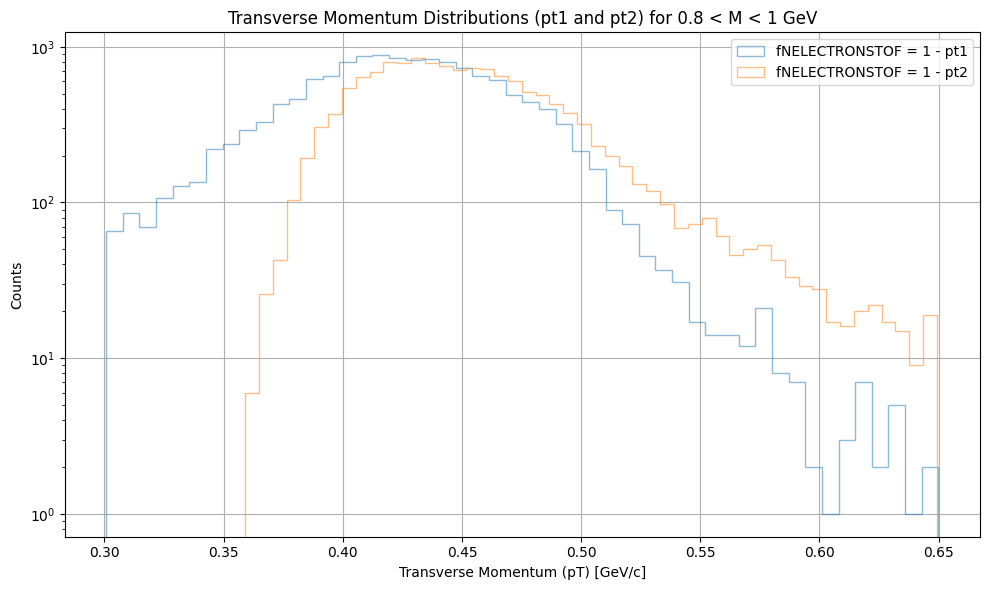

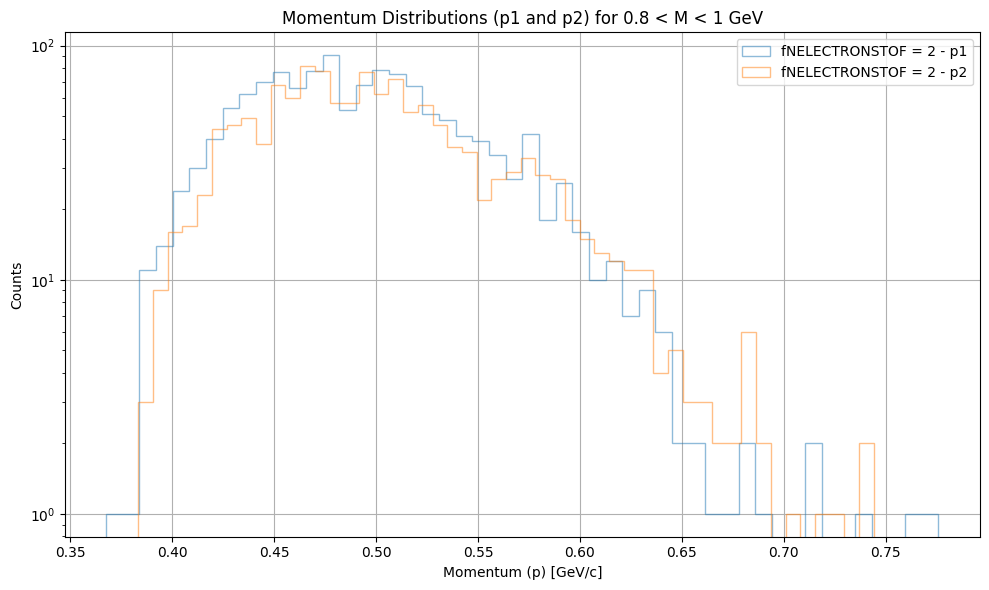

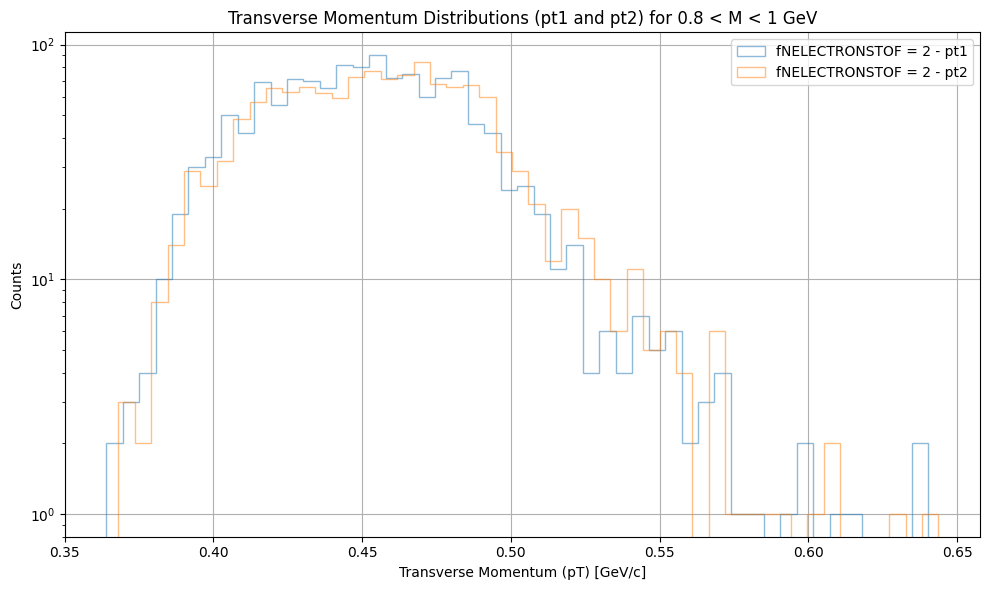

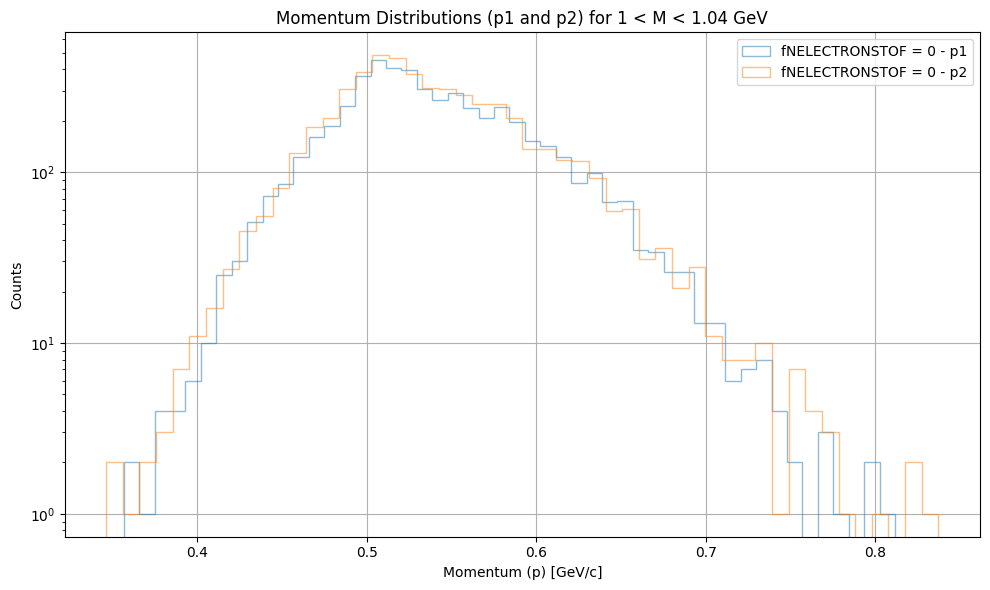

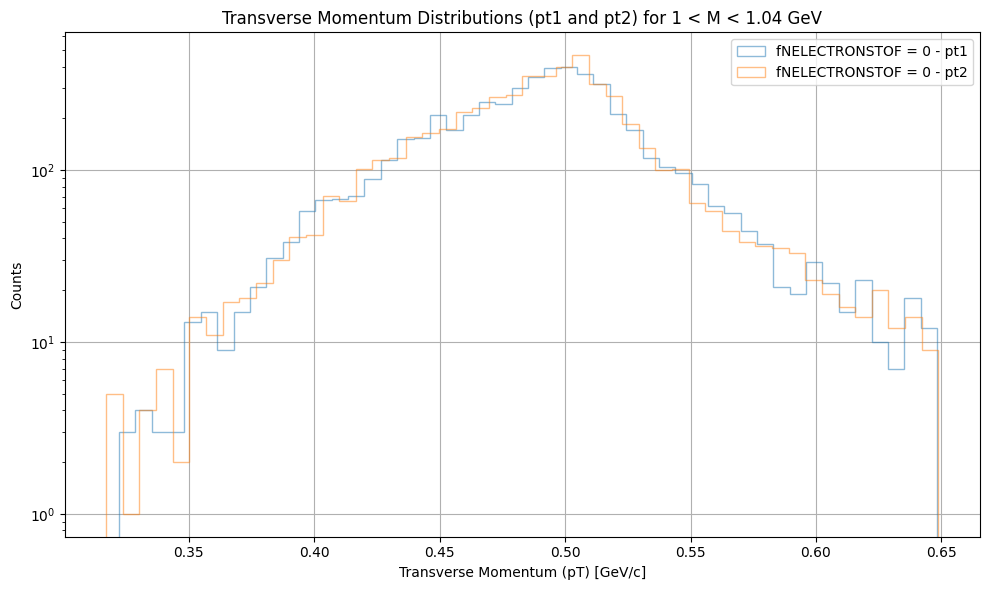

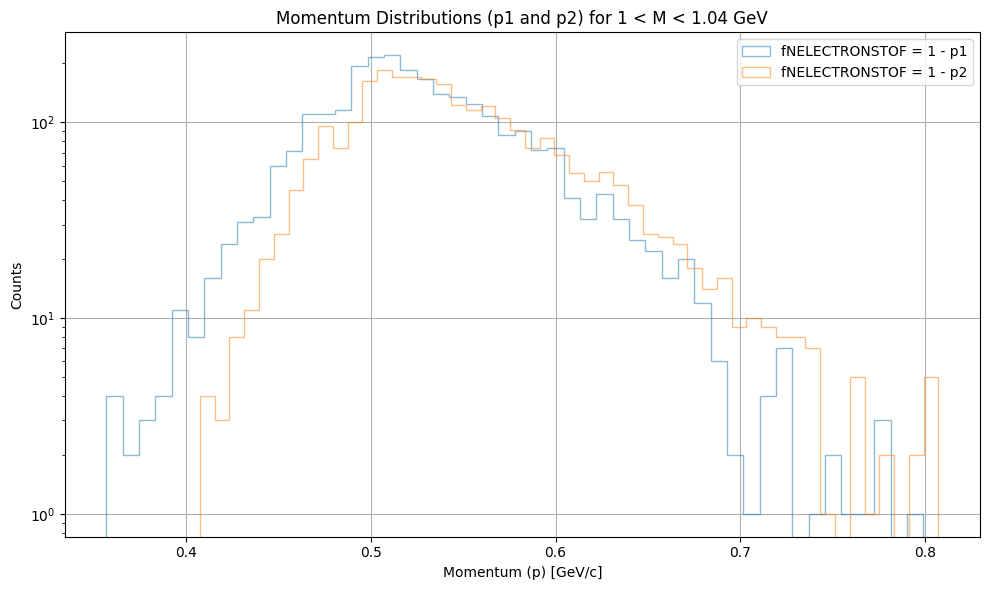

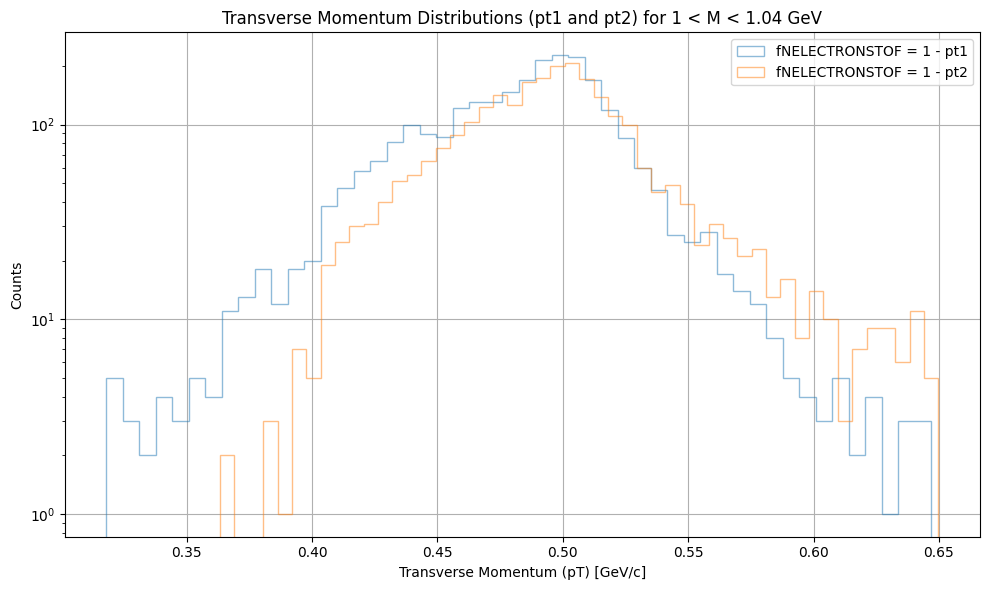

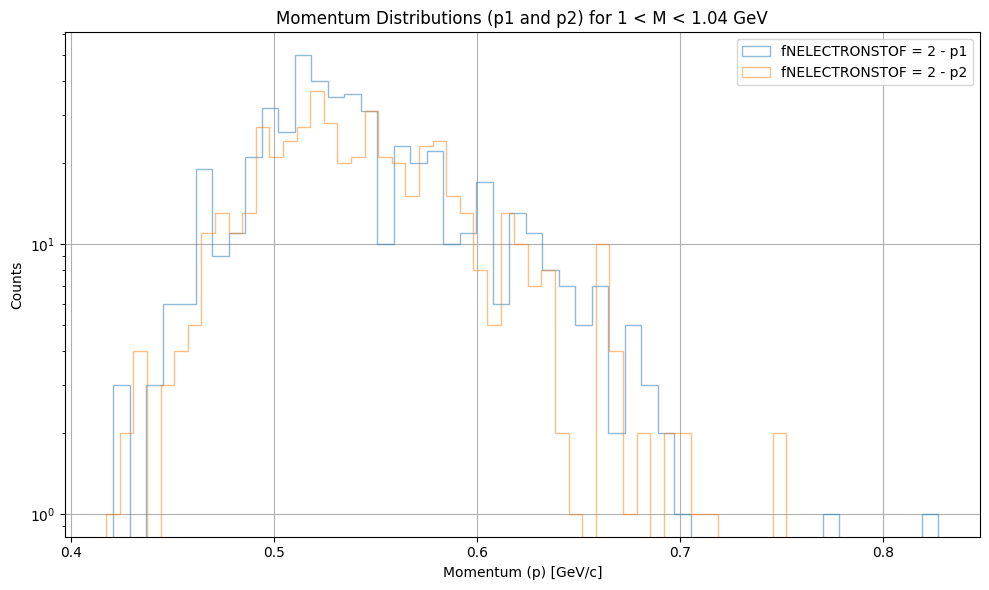

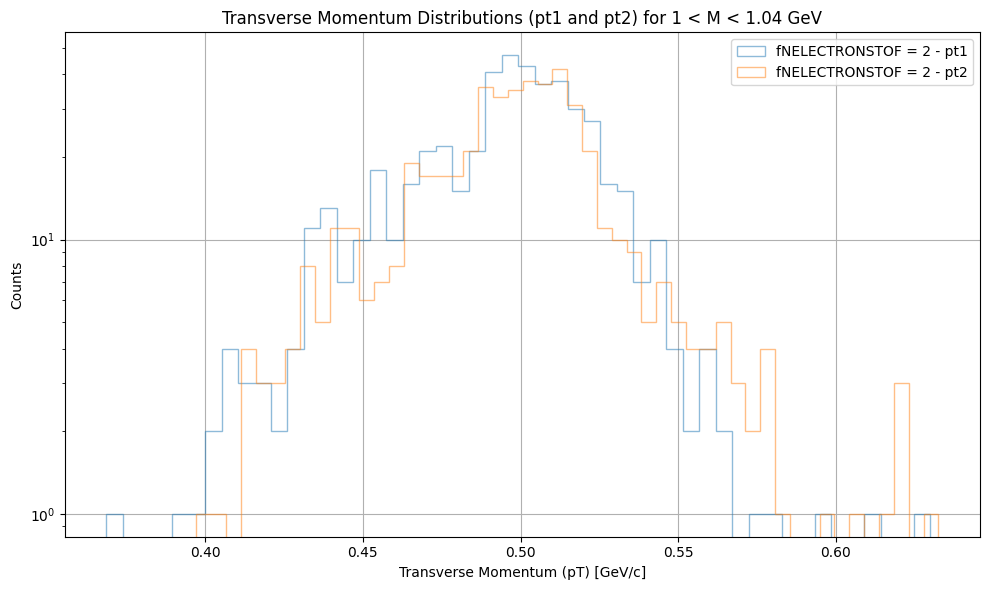

In [7]:
def add_invariant_mass(dataframes):
    """
    Adds the invariant mass (M) column to each DataFrame.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    """
    for tof_value, df in dataframes.items():
        total_energy = df["fPE1"] + df["fPE2"]
        total_px = df["fPX1"] + df["fPX2"]
        total_py = df["fPY1"] + df["fPY2"]
        total_pz = df["fPZ1"] + df["fPZ2"]
        total_p_squared = total_px**2 + total_py**2 + total_pz**2
        df["M"] = np.sqrt(total_energy**2 - total_p_squared)

def plot_filtered_momenta(dataframes, mass_range, title_suffix, output_folder=None):
    """
    Plots p1, p2, pt1, and pt2 for the given DataFrames with the specified invariant mass range.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    mass_range (tuple): Tuple specifying the invariant mass range (min, max).
    title_suffix (str): Suffix to add to the plot titles for context.
    output_folder (str, optional): Folder to save the plots; if None, plots will be shown interactively.
    """
    mass_min, mass_max = mass_range
    
    for tof_value, df in dataframes.items():
        # Filter the DataFrame for the specified invariant mass range
        filtered_df = df[(df["M"] > mass_min) & (df["M"] <= mass_max)]

        # Plot p1 and p2
        plt.figure(figsize=(10, 6))
        plt.hist(filtered_df["p1"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - p1", histtype="step")
        plt.hist(filtered_df["p2"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - p2", histtype="step")
        plt.yscale("log")
        plt.xlabel("Momentum (p) [GeV/c]")
        plt.ylabel("Counts")
        plt.title(f"Momentum Distributions (p1 and p2) {title_suffix}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        if output_folder:
            plt.savefig(f"{output_folder}/momentum_p1_p2_{tof_value}_{title_suffix.replace(' ', '_')}.pdf")
        else:
            plt.show()

        # Plot pt1 and pt2
        plt.figure(figsize=(10, 6))
        plt.hist(filtered_df["pt1"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - pt1", histtype="step")
        plt.hist(filtered_df["pt2"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - pt2", histtype="step")
        plt.yscale("log")
        plt.xlabel("Transverse Momentum (pT) [GeV/c]")
        plt.ylabel("Counts")
        plt.title(f"Transverse Momentum Distributions (pt1 and pt2) {title_suffix}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        if output_folder:
            plt.savefig(f"{output_folder}/transverse_momentum_pt1_pt2_{tof_value}_{title_suffix.replace(' ', '_')}.pdf")
        else:
            plt.show()

# Add the invariant mass column
add_invariant_mass(df_original)

# Plot the filtered distributions for the two mass ranges
plot_filtered_momenta(df_original, (0.8, 1.0), "for 0.8 < M < 1 GeV")
plot_filtered_momenta(df_original, (1.0, 1.04), "for 1 < M < 1.04 GeV")


In [8]:
df_original[2].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M
80,-0.495379,0.182227,0.107824,0.538733,0.522859,-0.193218,0.487452,0.740489,2,0.538733,0.740489,0.527833,0.557418,1.131893
97,0.362124,-0.528337,0.066572,0.643976,-0.367282,0.531846,-0.438028,0.780785,2,0.643976,0.780785,0.640526,0.646341,1.375473
187,0.504183,-0.186353,0.406544,0.673948,-0.515286,0.192391,0.283341,0.618722,2,0.673948,0.618722,0.537520,0.550031,1.093112
190,-0.061697,0.461395,-0.176633,0.497887,0.073327,-0.464846,-0.364765,0.595409,2,0.497886,0.595409,0.465501,0.470594,0.949757
235,0.479244,0.102835,0.125527,0.505972,-0.562857,-0.104567,0.203143,0.607462,2,0.505972,0.607462,0.490153,0.572488,1.060526


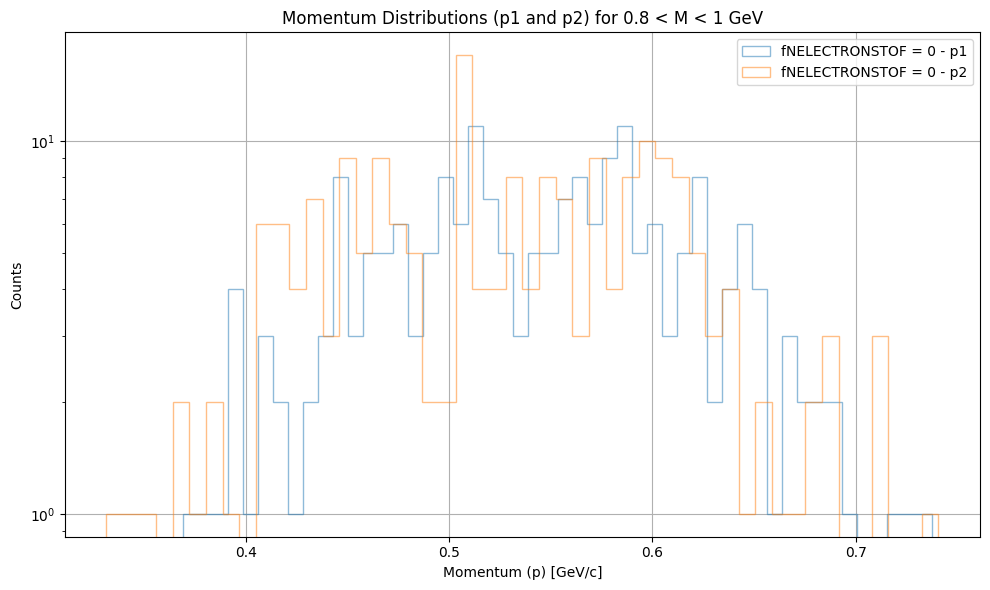

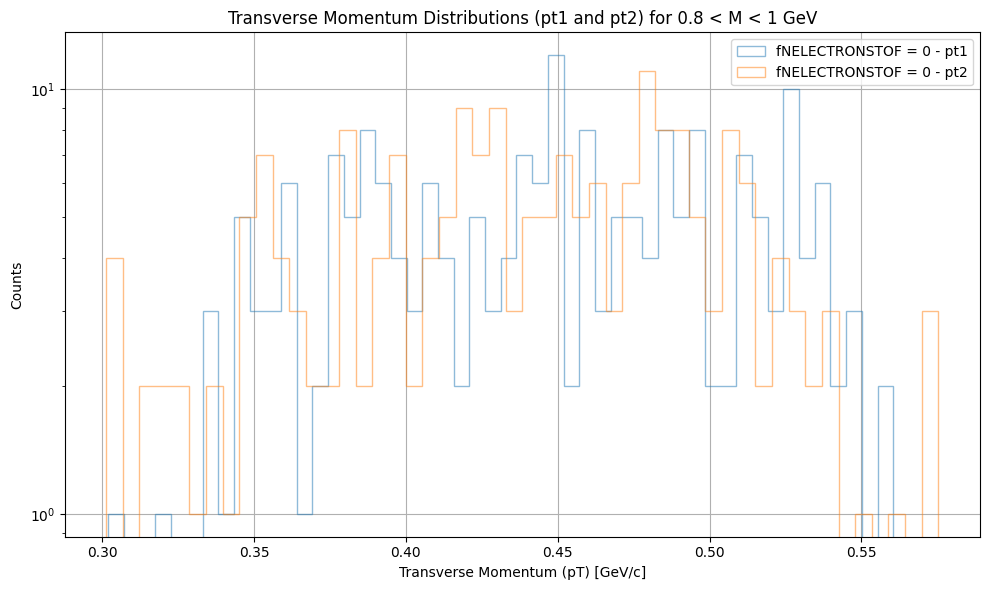

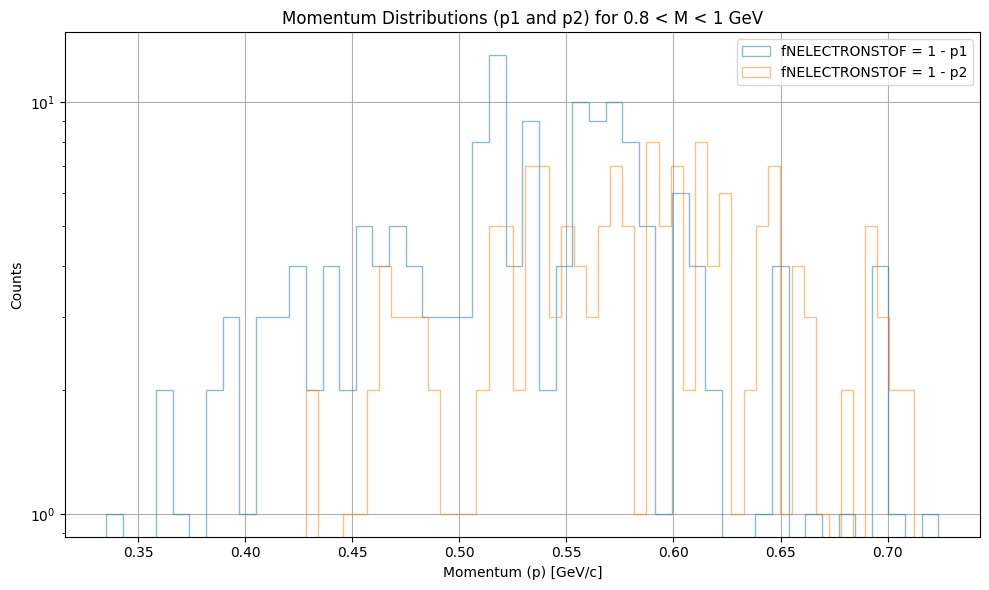

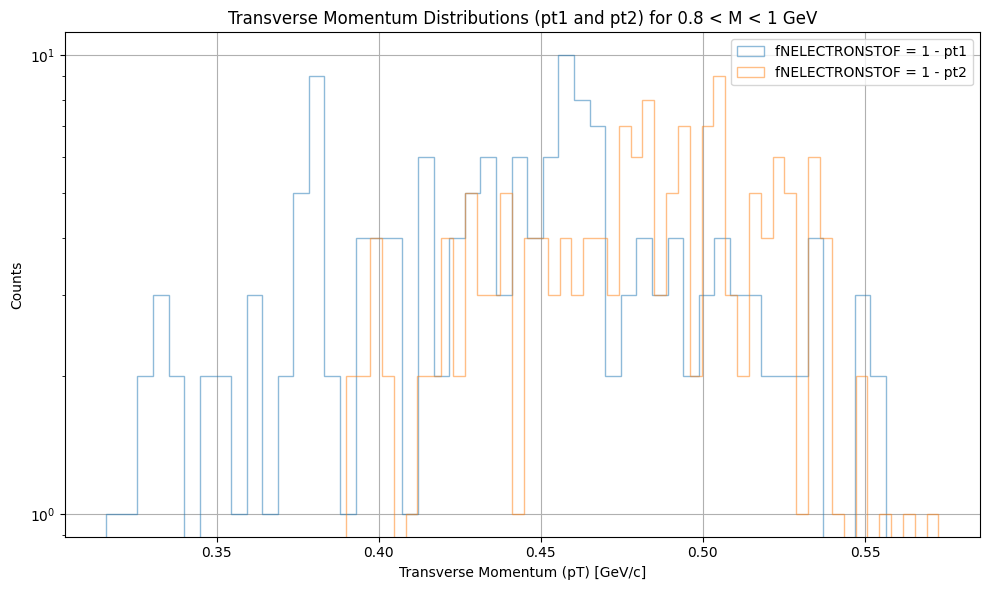

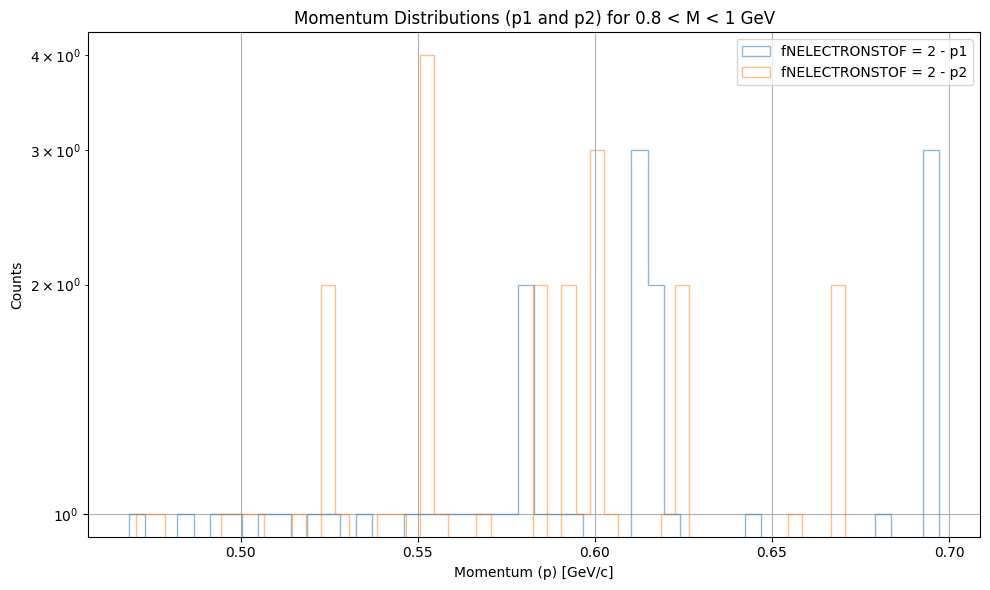

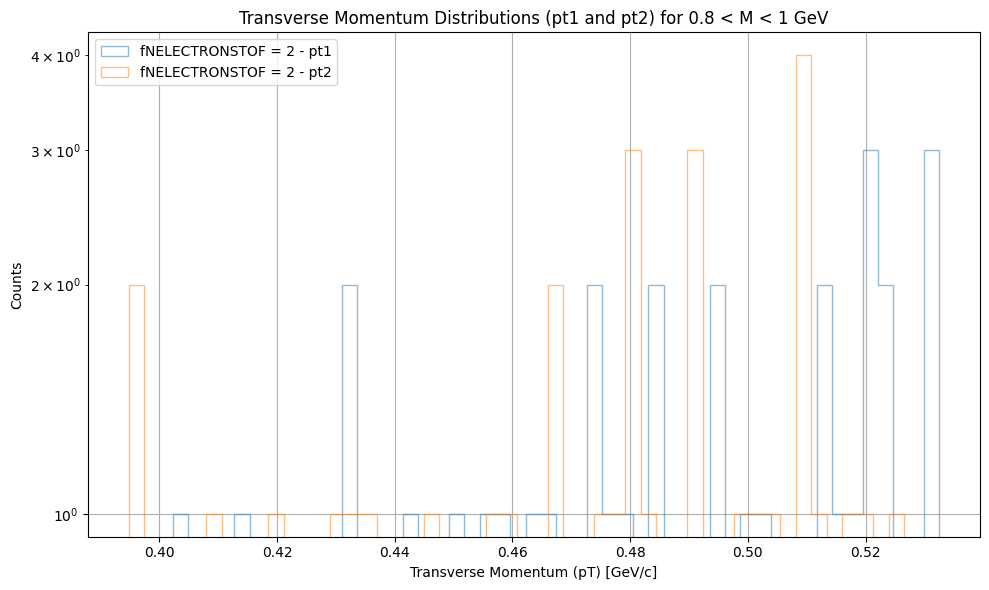

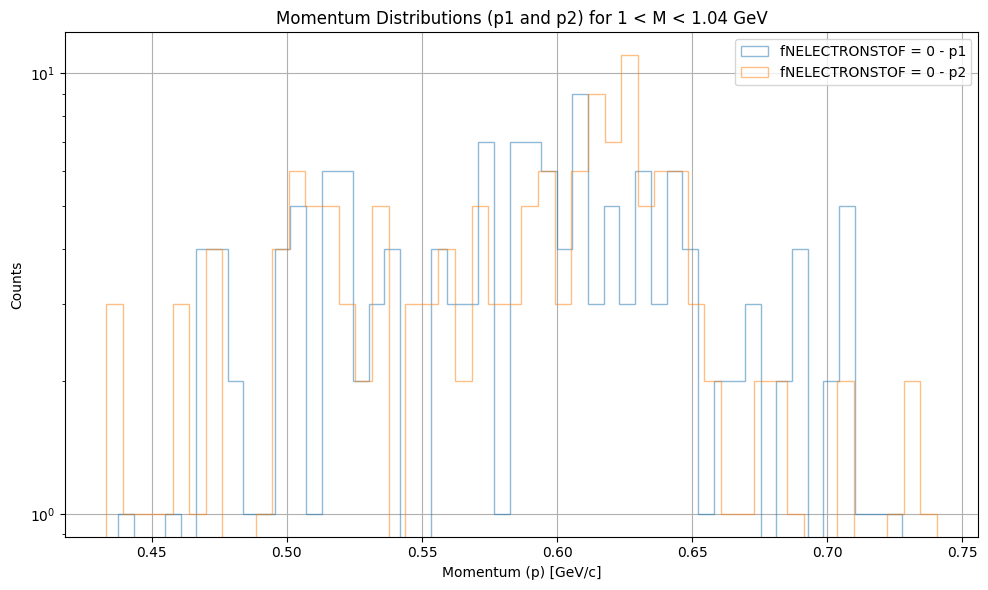

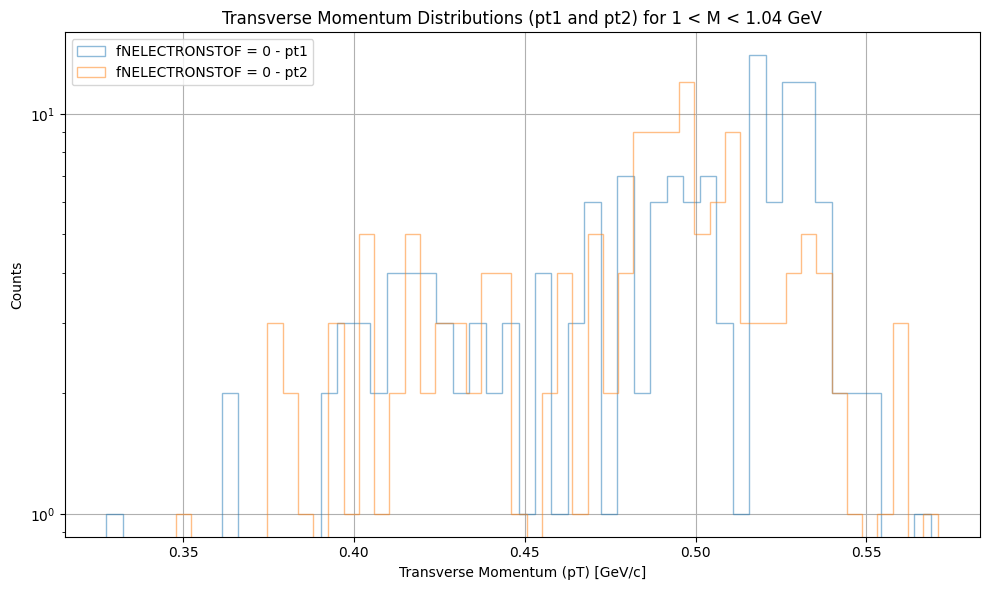

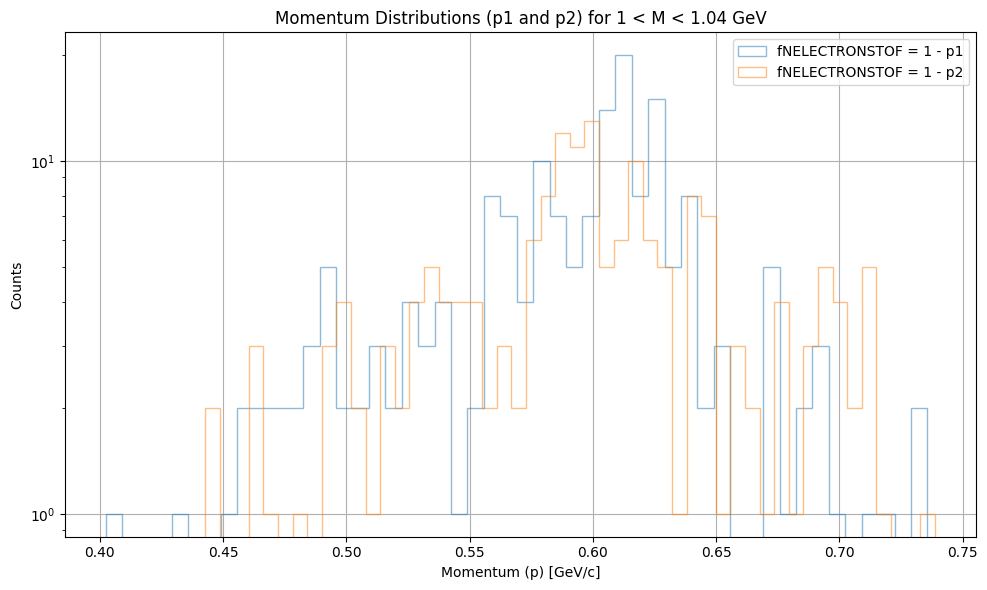

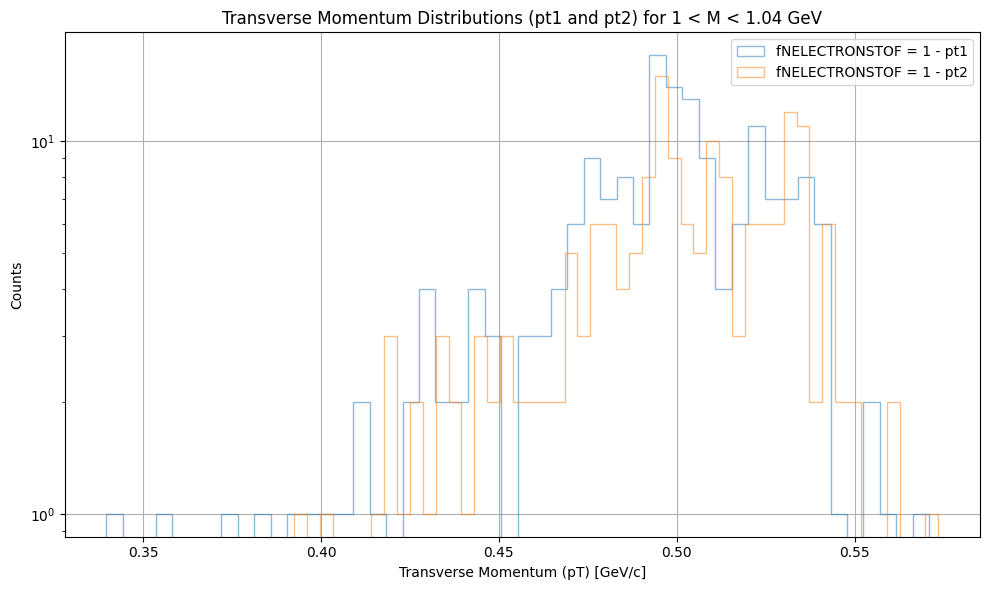

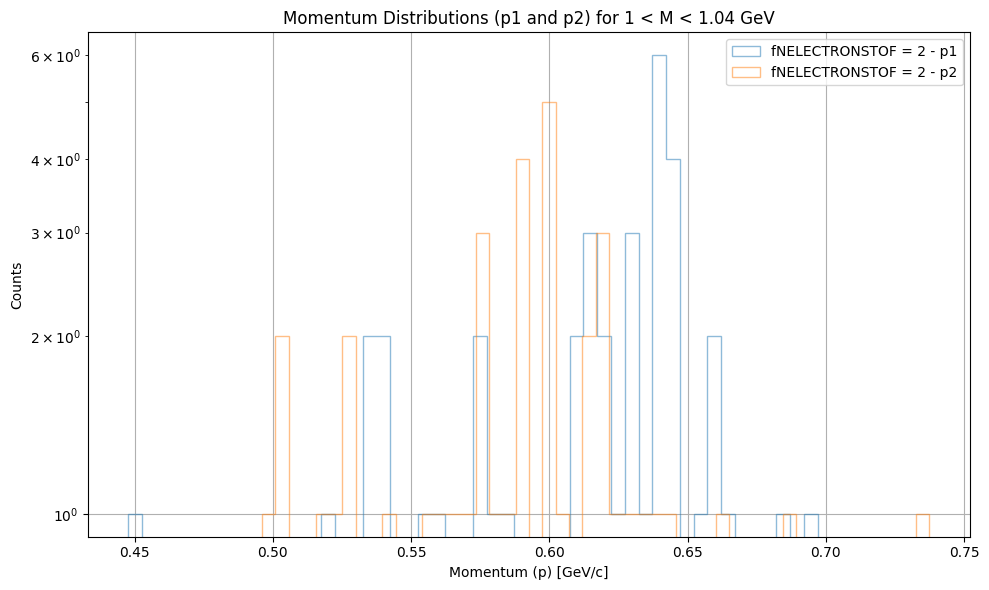

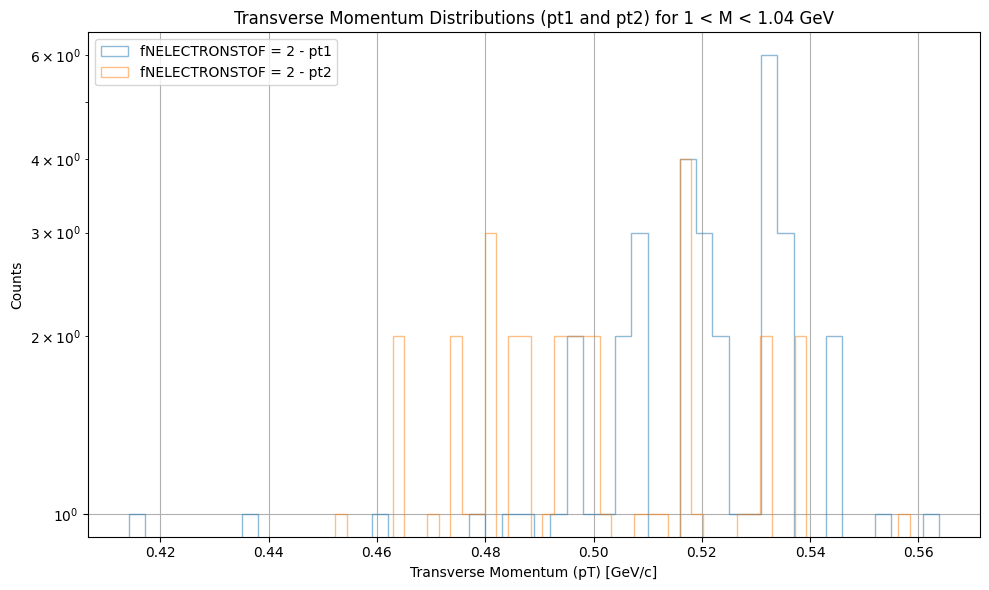

In [9]:
# Add the invariant mass column
add_invariant_mass(df_original_mc)

# Plot the filtered distributions for the two mass ranges
plot_filtered_momenta(df_original_mc, (0.8, 1.0), "for 0.8 < M < 1 GeV")
plot_filtered_momenta(df_original_mc, (1.0, 1.04), "for 1 < M < 1.04 GeV")


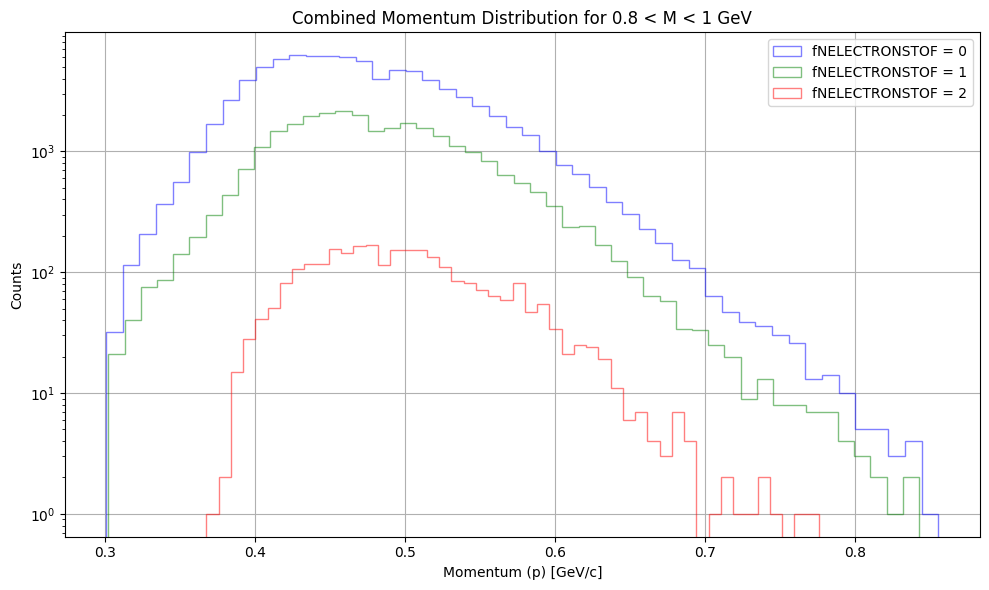

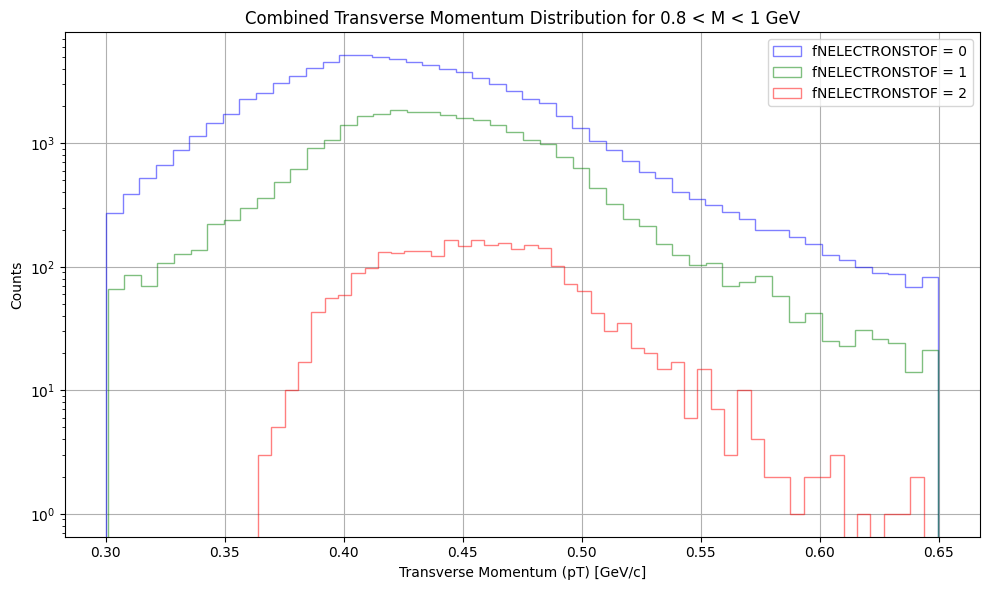

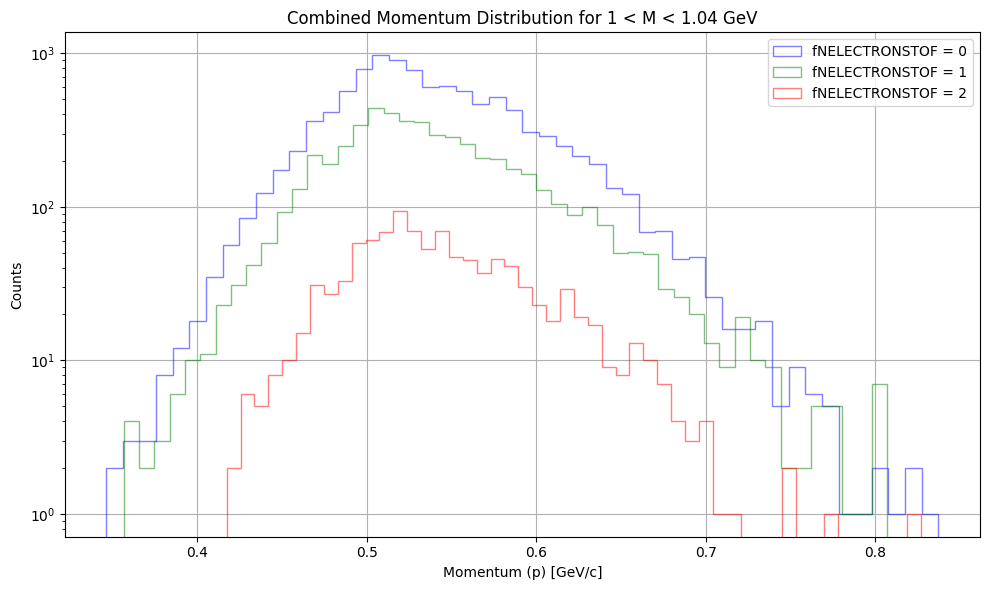

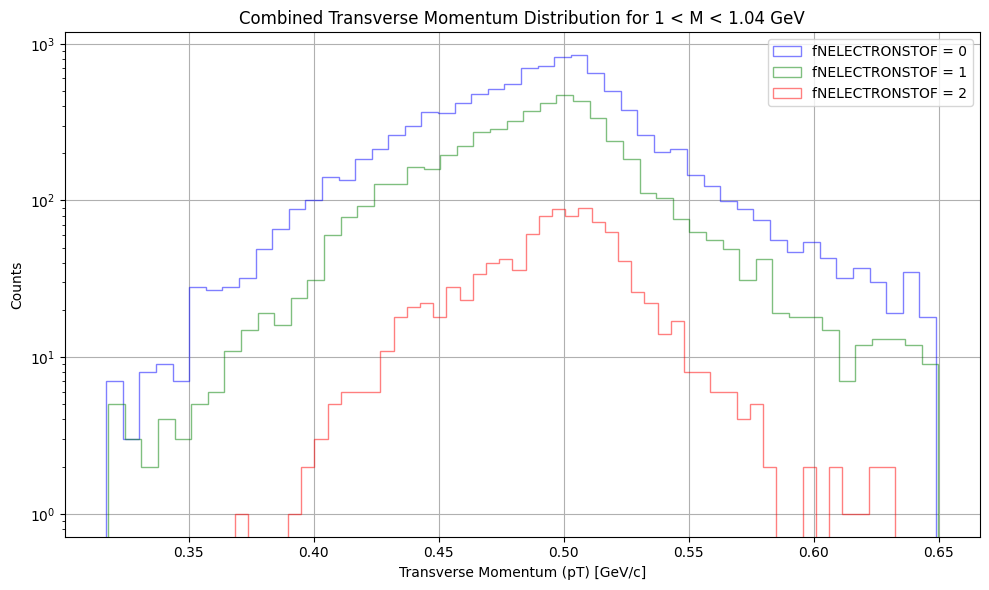

In [10]:
def plot_combined_momenta(dataframes, mass_range, title_suffix, output_folder=None):
    """
    Merges p1 and p2 into p, and pt1 and pt2 into pt, and plots the combined distributions
    for all fNELECTRONSTOF values on the same plots.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    mass_range (tuple): Tuple specifying the invariant mass range (min, max).
    title_suffix (str): Suffix to add to the plot titles for context.
    output_folder (str, optional): Folder to save the plots; if None, plots will be shown interactively.
    """
    mass_min, mass_max = mass_range

    # Colors for the different fNELECTRONSTOF values
    colors = {0: "blue", 1: "green", 2: "red"}

    # Plot merged momentum (p) distributions
    plt.figure(figsize=(10, 6))
    for tof_value, df in dataframes.items():
        # Filter the DataFrame for the specified invariant mass range
        filtered_df = df[(df["M"] > mass_min) & (df["M"] <= mass_max)]

        # Merge p1 and p2 into a single column 'p'
        p = pd.concat([filtered_df["p1"], filtered_df["p2"]])

        # Plot the merged p distribution
        plt.hist(p, bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value}", histtype="step", color=colors[tof_value])

    plt.yscale("log")
    plt.xlabel("Momentum (p) [GeV/c]")
    plt.ylabel("Counts")
    plt.title(f"Combined Momentum Distribution {title_suffix}")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    if output_folder:
        plt.savefig(f"{output_folder}/combined_momentum_p_{title_suffix.replace(' ', '_')}.pdf")
    else:
        plt.show()

    # Plot merged transverse momentum (pt) distributions
    plt.figure(figsize=(10, 6))
    for tof_value, df in dataframes.items():
        # Filter the DataFrame for the specified invariant mass range
        filtered_df = df[(df["M"] > mass_min) & (df["M"] <= mass_max)]

        # Merge pt1 and pt2 into a single column 'pt'
        pt = pd.concat([filtered_df["pt1"], filtered_df["pt2"]])

        # Plot the merged pt distribution
        plt.hist(pt, bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value}", histtype="step", color=colors[tof_value])

    plt.yscale("log")
    plt.xlabel("Transverse Momentum (pT) [GeV/c]")
    plt.ylabel("Counts")
    plt.title(f"Combined Transverse Momentum Distribution {title_suffix}")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    if output_folder:
        plt.savefig(f"{output_folder}/combined_transverse_momentum_pt_{title_suffix.replace(' ', '_')}.pdf")
    else:
        plt.show()


# Plot the combined distributions for the two mass ranges
plot_combined_momenta(df_original, (0.8, 1.0), "for 0.8 < M < 1 GeV")
plot_combined_momenta(df_original, (1.0, 1.04), "for 1 < M < 1.04 GeV")


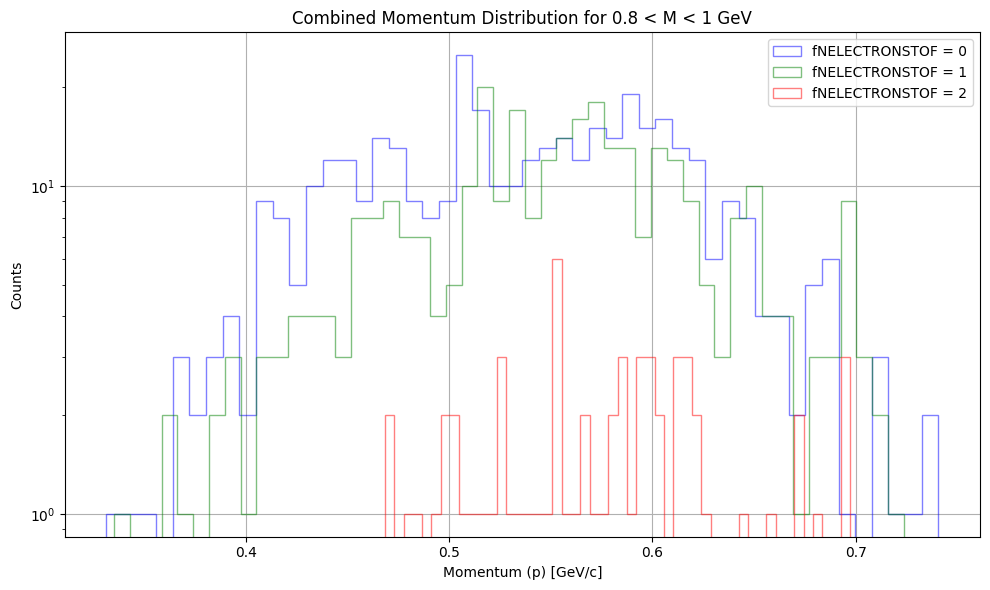

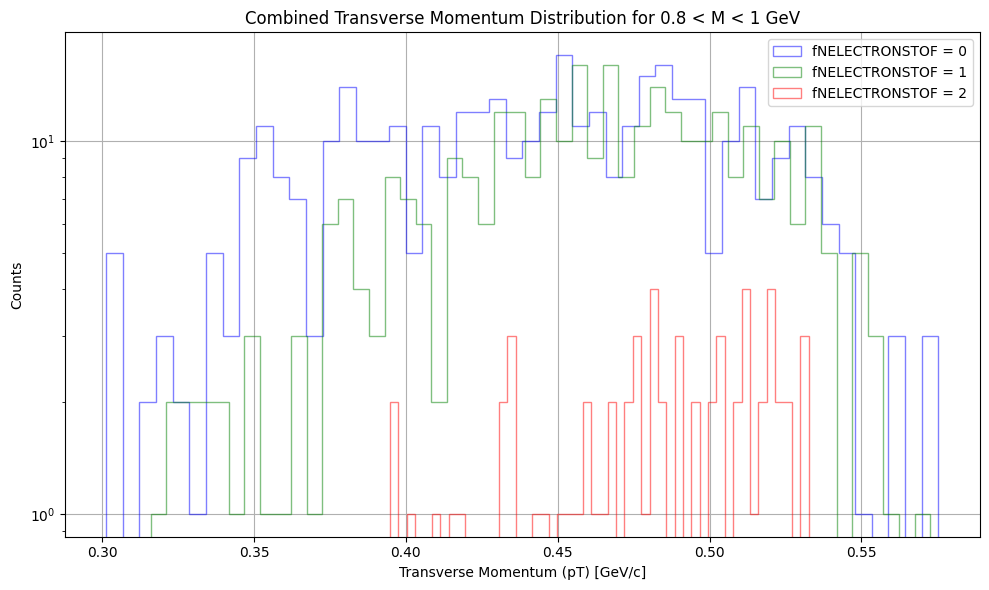

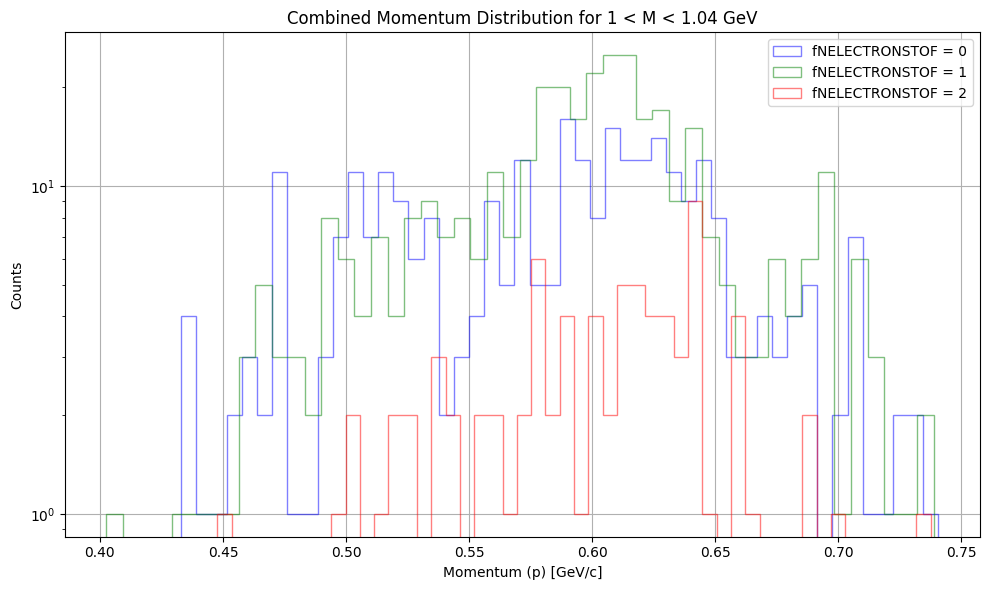

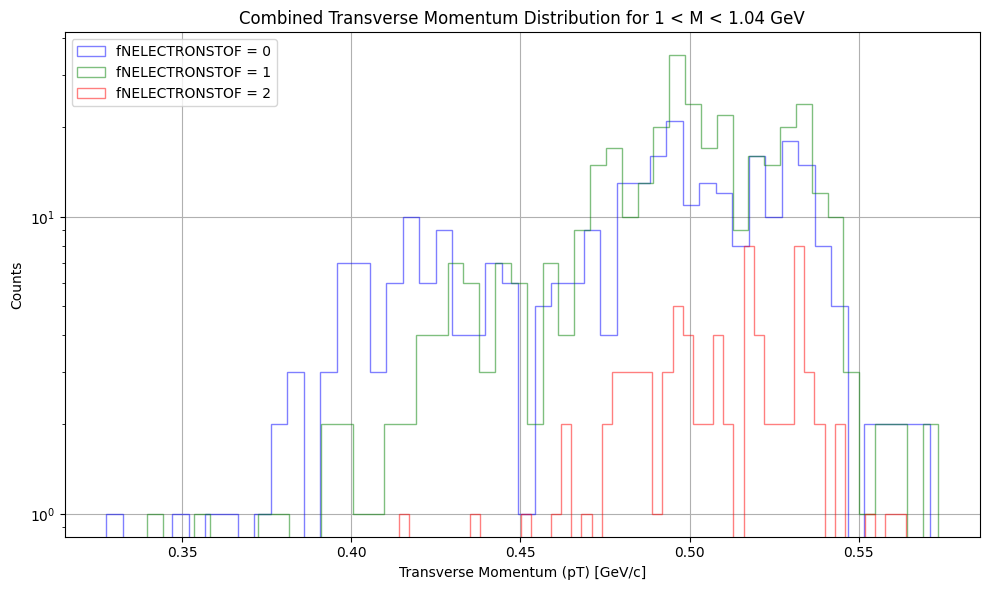

In [11]:
# Plot the combined distributions for the two mass ranges
plot_combined_momenta(df_original_mc, (0.8, 1.0), "for 0.8 < M < 1 GeV")
plot_combined_momenta(df_original_mc, (1.0, 1.04), "for 1 < M < 1.04 GeV")


In [12]:
def add_combined_4vector_momenta_and_norm(dataframes):
    """
    Adds `p` (momentum magnitude), `pt` (transverse momentum), and `norm` (4-vector norm) columns
    to the input DataFrames by summing the 4-vectors of the two tracks in each event.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each `fNELECTRONSTOF` value.
    """
    for tof_value, df in dataframes.items():
        # Calculate combined px, py, pz, and energy
        combined_px = df["fPX1"] + df["fPX2"]
        combined_py = df["fPY1"] + df["fPY2"]
        combined_pz = df["fPZ1"] + df["fPZ2"]
        combined_energy = df["fPE1"] + df["fPE2"]

        # Compute p (momentum magnitude)
        df["p"] = np.sqrt(combined_px**2 + combined_py**2 + combined_pz**2)
        
        # Compute pt (transverse momentum)
        df["pt"] = np.sqrt(combined_px**2 + combined_py**2)
        
        # Compute norm of the 4-vector
        df["norm"] = np.sqrt(combined_energy**2 - (combined_px**2 + combined_py**2 + combined_pz**2))
        
        # Update the DataFrame in the dictionary
        dataframes[tof_value] = df

    print("Added `p`, `pt`, and `norm` columns to all DataFrames.")

# Example usage:
add_combined_4vector_momenta_and_norm(df_original)
add_combined_4vector_momenta_and_norm(df_original_mc)

# Verify the updated DataFrames
for tof_value, subset_df in df_original.items():
    print(f"\nDataFrame for fNELECTRONSTOF = {tof_value}:")
    print(subset_df[["p", "pt", "norm"]].head())


Added `p`, `pt`, and `norm` columns to all DataFrames.
Added `p`, `pt`, and `norm` columns to all DataFrames.

DataFrame for fNELECTRONSTOF = 0:
          p        pt      norm
0  0.081730  0.015648  1.044145
1  0.301845  0.021267  0.675507
3  0.503370  0.014267  1.002446
4  0.186608  0.010298  0.847201
6  0.629309  0.050420  1.208328

DataFrame for fNELECTRONSTOF = 1:
           p        pt      norm
2   0.140921  0.078425  1.110052
5   0.302387  0.032446  0.949829
7   0.256355  0.049433  1.029289
9   0.345060  0.017806  0.861869
15  0.211650  0.046951  0.768541

DataFrame for fNELECTRONSTOF = 2:
            p        pt      norm
80   0.596011  0.029597  1.131893
97   0.371508  0.006239  1.375473
187  0.690001  0.012639  1.093112
190  0.541534  0.012132  0.949757
235  0.339143  0.083631  1.060526


In [13]:
df_original[2].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm
80,-0.495379,0.182227,0.107824,0.538733,0.522859,-0.193218,0.487452,0.740489,2,0.538733,0.740489,0.527833,0.557418,1.131893,0.596011,0.029597,1.131893
97,0.362124,-0.528337,0.066572,0.643976,-0.367282,0.531846,-0.438028,0.780785,2,0.643976,0.780785,0.640526,0.646341,1.375473,0.371508,0.006239,1.375473
187,0.504183,-0.186353,0.406544,0.673948,-0.515286,0.192391,0.283341,0.618722,2,0.673948,0.618722,0.537520,0.550031,1.093112,0.690001,0.012639,1.093112
190,-0.061697,0.461395,-0.176633,0.497887,0.073327,-0.464846,-0.364765,0.595409,2,0.497886,0.595409,0.465501,0.470594,0.949757,0.541534,0.012132,0.949757
235,0.479244,0.102835,0.125527,0.505972,-0.562857,-0.104567,0.203143,0.607462,2,0.505972,0.607462,0.490153,0.572488,1.060526,0.339143,0.083631,1.060526


In [14]:
df_original_mc[2].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm
14,-0.444814,-0.111282,0.095485,0.468360,0.410228,0.131580,-0.189227,0.470540,2,0.468359,0.470539,0.458523,0.430814,0.933347,0.101960,0.040103,0.933347
40,-0.046926,-0.411486,0.169953,0.447669,0.062477,0.458947,-0.345003,0.577549,2,0.447669,0.577549,0.414154,0.463180,1.008928,0.182035,0.049943,1.008928
44,-0.232329,0.466674,-0.324831,0.614229,0.172748,-0.371504,-0.289023,0.501389,2,0.614229,0.501389,0.521308,0.409703,0.924759,0.624038,0.112283,0.924759
53,0.181233,-0.425218,0.312274,0.557827,-0.260428,0.439112,0.434741,0.670553,2,0.557827,0.670553,0.462229,0.510531,0.971814,0.751329,0.080404,0.971814
55,-0.398112,-0.351700,0.354662,0.638727,0.363641,0.324934,0.199371,0.526845,2,0.638726,0.526845,0.531212,0.487665,1.024549,0.555750,0.043643,1.024549


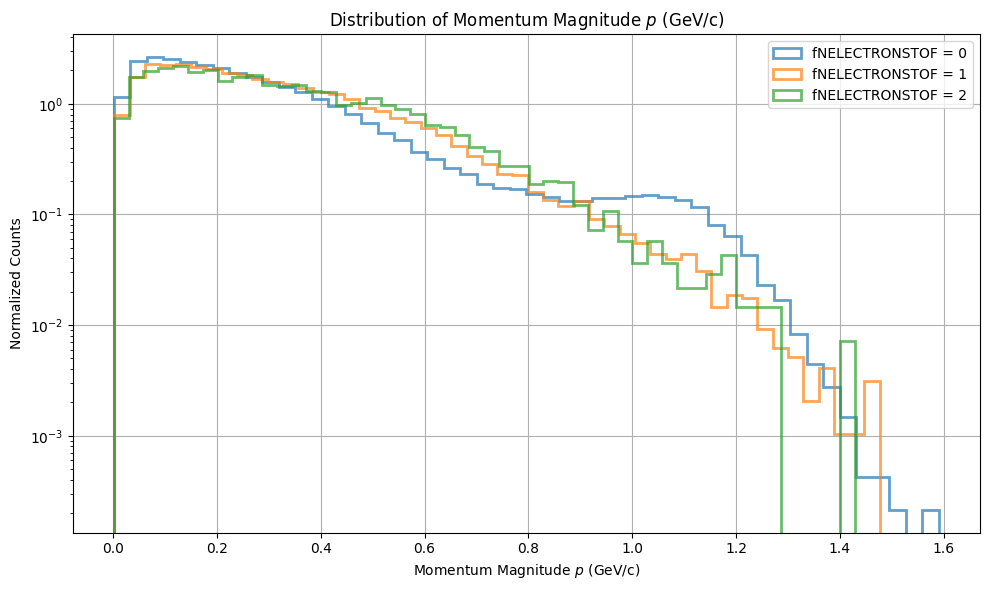

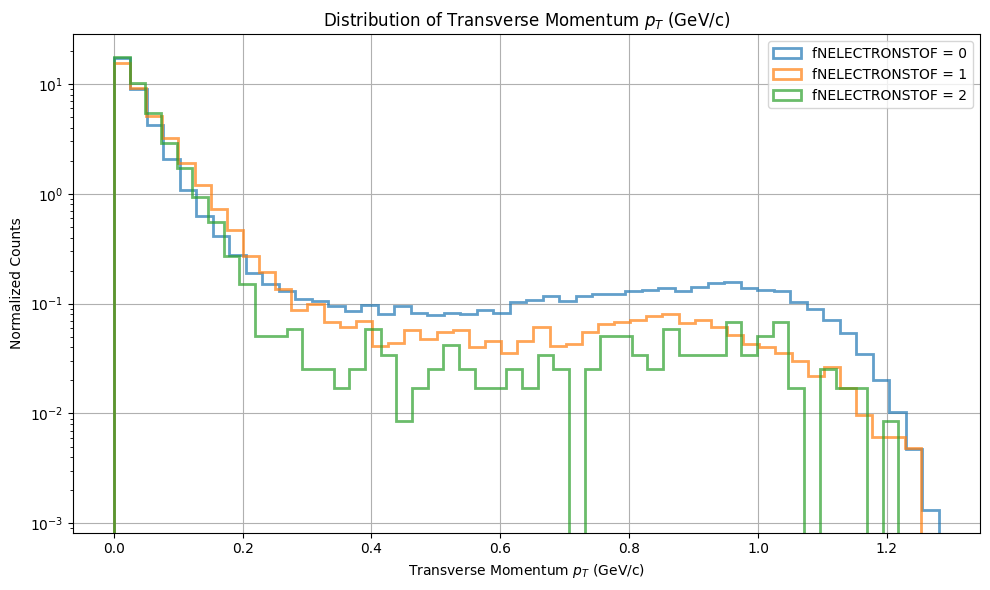

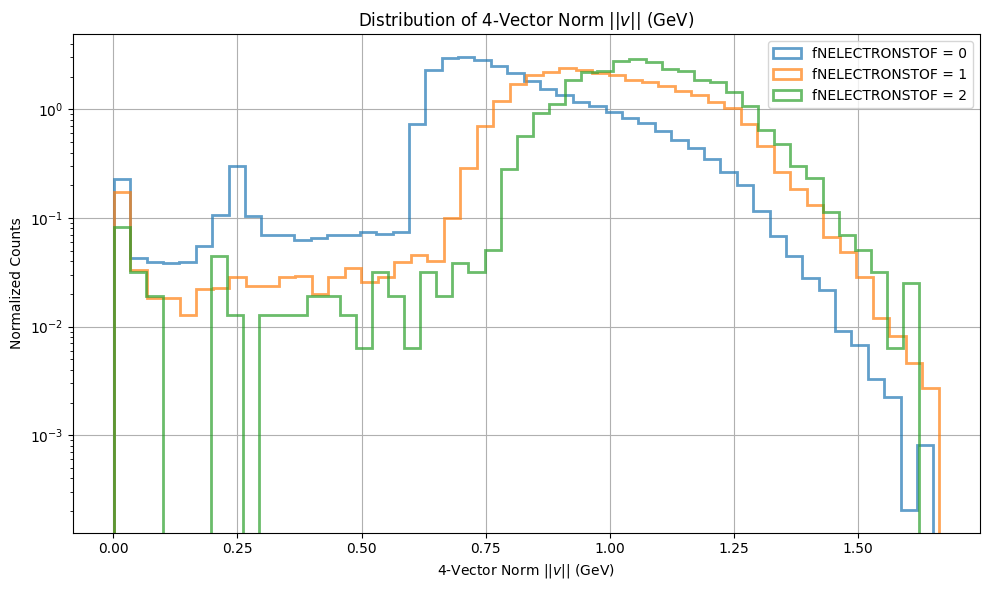

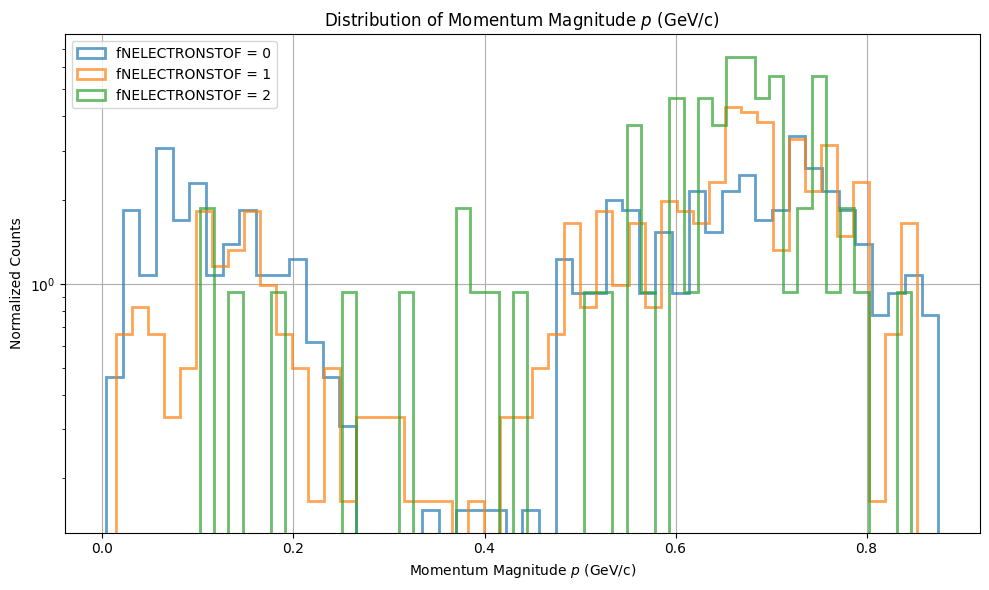

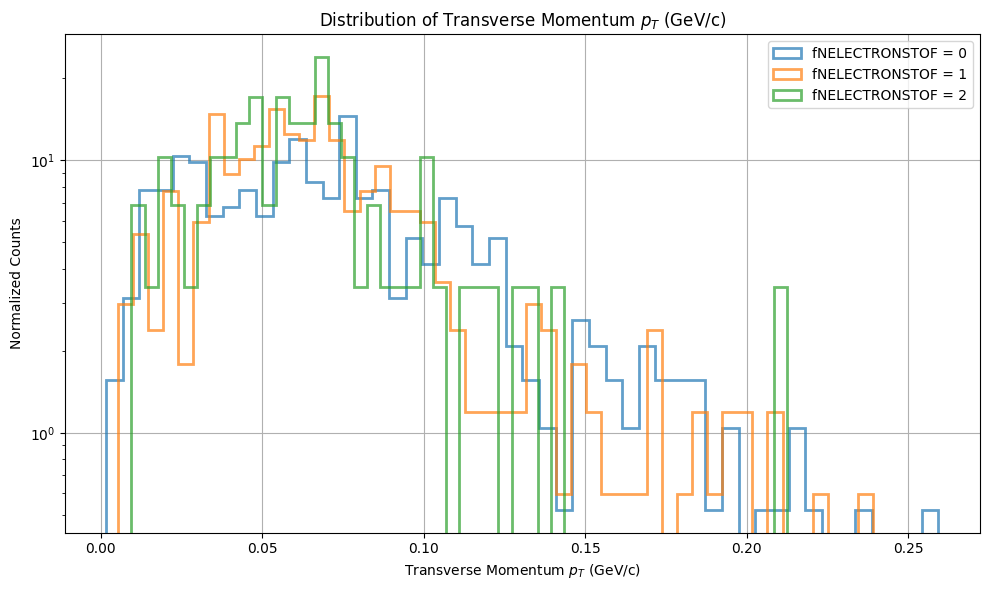

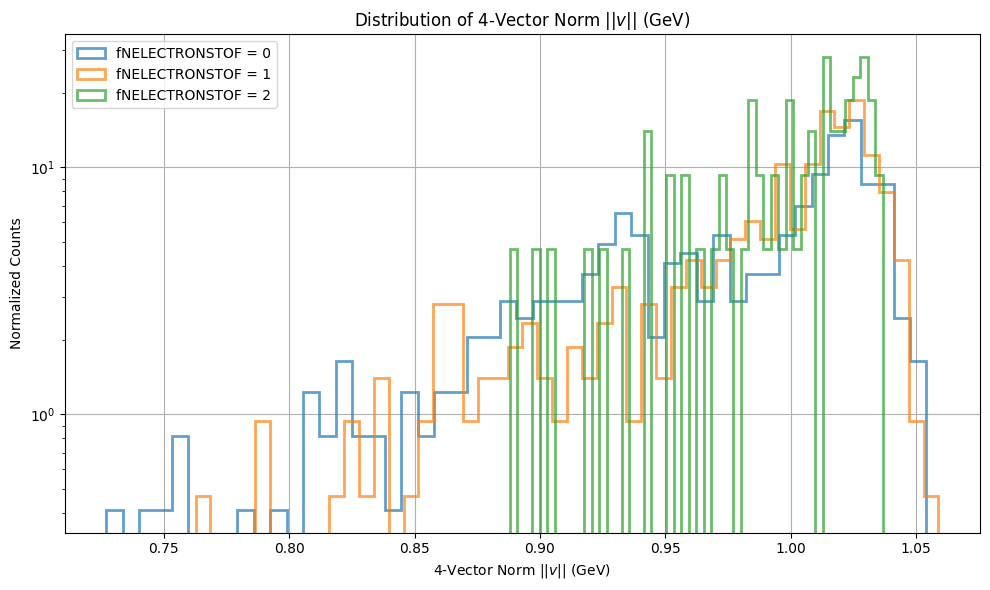

In [15]:
def plot_combined_momenta_and_norm(dataframes):
    """
    Plots the distributions of `p`, `pt`, and `norm` for the three `fNELECTRONSTOF` DataFrames on the same plots.
    The plots are displayed directly instead of being saved.
    
    Parameters:
    dataframes (dict): Dictionary of DataFrames with keys 0, 1, 2 representing `fNELECTRONSTOF`.
    """
    # Define the columns to plot and their labels
    columns_to_plot = {
        "p": "Momentum Magnitude $p$ (GeV/c)",
        "pt": "Transverse Momentum $p_T$ (GeV/c)",
        "norm": "4-Vector Norm $||v||$ (GeV)"
    }

    for column, xlabel in columns_to_plot.items():
        plt.figure(figsize=(10, 6))

        for tof_value, df in dataframes.items():
            plt.hist(
                df[column],
                bins=50,
                alpha=0.7,
                label=f"fNELECTRONSTOF = {tof_value}",
                density=True,  # Normalize the histograms
                histtype="step",
                linewidth=2
            )

        # Add labels and legend
        plt.xlabel(xlabel)
        plt.ylabel("Normalized Counts")
        plt.title(f"Distribution of {xlabel}")
        plt.yscale("log")  # Set y-axis to log scale
        plt.legend()
        plt.grid()
        plt.tight_layout()

        # Show the plot directly
        plt.show()

# Example usage:
plot_combined_momenta_and_norm(df_original)
plot_combined_momenta_and_norm(df_original_mc)


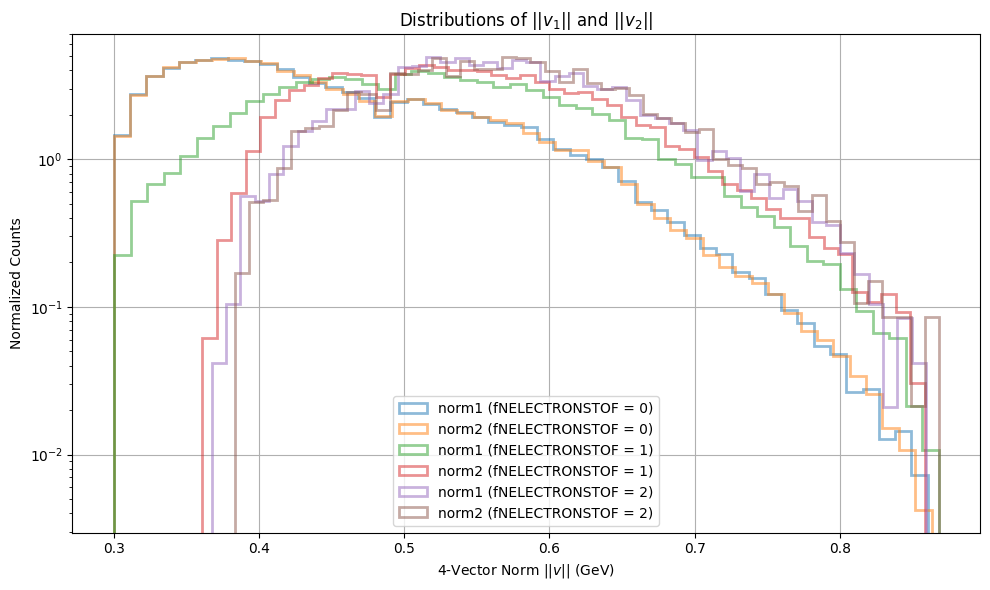

In [16]:
def add_norm1_norm2(dataframes):
    """
    Adds the columns `norm1` and `norm2` to the DataFrames in the input dictionary.
    
    Parameters:
    dataframes (dict): Dictionary of DataFrames with keys 0, 1, 2 representing `fNELECTRONSTOF`.
    """
    for tof_value, df in dataframes.items():
        # Compute norm1 and norm2
        # df["norm1"] = np.sqrt(df["fPE1"]**2 - (df["fPX1"]**2 + df["fPY1"]**2 + df["fPZ1"]**2))
        # df["norm2"] = np.sqrt(df["fPE2"]**2 - (df["fPX2"]**2 + df["fPY2"]**2 + df["fPZ2"]**2))
        df["norm1"] = np.sqrt(df["fPX1"]**2 + df["fPY1"]**2 + df["fPZ1"]**2)
        df["norm2"] = np.sqrt(df["fPX2"]**2 + df["fPY2"]**2 + df["fPZ2"]**2)

def plot_norm1_norm2(dataframes):
    """
    Plots the distributions of `norm1` and `norm2` on the same plot with separate curves
    for `fNELECTRONSTOF = 0, 1, 2`.
    
    Parameters:
    dataframes (dict): Dictionary of DataFrames with keys 0, 1, 2 representing `fNELECTRONSTOF`.
    """
    plt.figure(figsize=(10, 6))

    for tof_value, df in dataframes.items():
        # Plot norm1
        plt.hist(
            df["norm1"],
            bins=50,
            alpha=0.5,
            label=f"norm1 (fNELECTRONSTOF = {tof_value})",
            density=True,  # Normalize the histograms
            histtype="step",
            linewidth=2
        )

        # Plot norm2
        plt.hist(
            df["norm2"],
            bins=50,
            alpha=0.5,
            label=f"norm2 (fNELECTRONSTOF = {tof_value})",
            density=True,  # Normalize the histograms
            histtype="step",
            linewidth=2
        )

    # Add labels and legend
    plt.xlabel("4-Vector Norm $||v||$ (GeV)")
    plt.ylabel("Normalized Counts")
    plt.title("Distributions of $||v_1||$ and $||v_2||$")
    plt.yscale("log")  # Set y-axis to log scale
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # Show the plot directly
    plt.show()

# Add norm1 and norm2 to the DataFrames
add_norm1_norm2(df_original)
add_norm1_norm2(df_original_mc)

# Plot norm1 and norm2
plot_norm1_norm2(df_original)


In [17]:
df_original[2].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm,norm1,norm2
80,-0.495379,0.182227,0.107824,0.538733,0.522859,-0.193218,0.487452,0.740489,2,0.538733,0.740489,0.527833,0.557418,1.131893,0.596011,0.029597,1.131893,0.538733,0.740489
97,0.362124,-0.528337,0.066572,0.643976,-0.367282,0.531846,-0.438028,0.780785,2,0.643976,0.780785,0.640526,0.646341,1.375473,0.371508,0.006239,1.375473,0.643976,0.780785
187,0.504183,-0.186353,0.406544,0.673948,-0.515286,0.192391,0.283341,0.618722,2,0.673948,0.618722,0.537520,0.550031,1.093112,0.690001,0.012639,1.093112,0.673948,0.618722
190,-0.061697,0.461395,-0.176633,0.497887,0.073327,-0.464846,-0.364765,0.595409,2,0.497886,0.595409,0.465501,0.470594,0.949757,0.541534,0.012132,0.949757,0.497886,0.595409
235,0.479244,0.102835,0.125527,0.505972,-0.562857,-0.104567,0.203143,0.607462,2,0.505972,0.607462,0.490153,0.572488,1.060526,0.339143,0.083631,1.060526,0.505972,0.607462


In [18]:
def create_filtered_dataframes(dataframes):
    """
    Creates six filtered DataFrames (two for each original DataFrame) based on invariant mass and
    kinematic conditions.

    Parameters:
    dataframes (dict): Dictionary of DataFrames with keys 0, 1, 2 representing `fNELECTRONSTOF`.

    Returns:
    dict: Dictionary containing six filtered DataFrames with keys
          `df_filtered_lower[0,1,2]` and `df_filtered_phi[0,1,2]`.
    """
    df_filtered_lower = []
    df_filtered_phi = []

    # Loop through each fNELECTRONSTOF value
    for tof_value, df in dataframes.items():
        # Define the conditions
        mass_condition_lower = (0.8 < df["M"]) & (df["M"] < 0.95)
        mass_condition_phi = (0.95 < df["M"]) & (df["M"] < 1.08)
        pt_condition = (0.42 < df["pt1"]) & (df["pt1"] < 0.55) & \
                       (0.42 < df["pt2"]) & (df["pt2"] < 0.55)
        p_condition = (0.47 < df["p1"]) & (df["p1"] < 0.61) & \
                      (0.47 < df["p2"]) & (df["p2"] < 0.61)

        # Filtered by lower mass condition and kinematic conditions
        df_lower = df[mass_condition_lower & pt_condition & p_condition]
        df_filtered_lower.append(df_lower)

        # Filtered by phi mass condition and kinematic conditions
        df_phi = df[mass_condition_phi & pt_condition & p_condition]
        df_filtered_phi.append(df_phi)

    return df_filtered_lower, df_filtered_phi

# Create the filtered DataFrames
df_filtered_lower, df_filtered_phi = create_filtered_dataframes(df_original)
df_filtered_lower_mc, df_filtered_phi_mc = create_filtered_dataframes(df_original_mc)


In [19]:
df_filtered_phi[0].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm,norm1,norm2
0,0.380054,-0.298258,0.218900,0.530393,-0.394773,0.303569,-0.138682,0.516946,2,0.530393,0.516946,0.483114,0.497996,1.044145,0.081730,0.015648,1.044145,0.530393,0.516946
3,-0.490760,-0.127637,-0.275347,0.577020,0.477005,0.131425,-0.227821,0.544710,2,0.577020,0.544709,0.507086,0.494779,1.002446,0.503370,0.014267,1.002446,0.577020,0.544709
21,0.307177,0.377516,0.072478,0.492066,-0.335084,-0.324916,-0.256377,0.532524,2,0.492066,0.532524,0.486699,0.466746,1.006191,0.193299,0.059545,1.006191,0.492066,0.532524
26,-0.173710,-0.432466,0.249971,0.528855,0.181690,0.432205,-0.234149,0.524060,2,0.528855,0.524059,0.466049,0.468842,1.052765,0.017723,0.007984,1.052765,0.528855,0.524059
52,0.379965,0.303154,-0.058889,0.489636,-0.334194,-0.332120,-0.061950,0.475213,2,0.489636,0.475213,0.486082,0.471157,0.955719,0.132424,0.054166,0.955719,0.489636,0.475213


In [20]:
df_filtered_lower[0].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm,norm1,norm2
208,-0.344338,0.299502,0.357128,0.579492,0.320247,-0.274716,0.309496,0.523273,2,0.579492,0.523273,0.456366,0.421932,0.877786,0.667519,0.034565,0.877786,0.579492,0.523273
219,-0.048646,-0.494320,-0.268802,0.564777,0.426420,0.219069,0.126229,0.495741,2,0.564777,0.495741,0.496708,0.479401,0.941220,0.488676,0.467415,0.941220,0.564777,0.495741
265,-0.271469,-0.374878,-0.353647,0.582490,0.320376,0.343247,-0.264297,0.538806,2,0.582490,0.538806,0.462848,0.469531,0.933841,0.620683,0.058244,0.933841,0.582490,0.538806
290,0.412916,-0.179455,-0.261675,0.520748,-0.427634,0.184280,-0.233429,0.520884,2,0.520747,0.520883,0.450227,0.465650,0.916312,0.495346,0.015489,0.916312,0.520747,0.520883
335,0.299854,0.388972,-0.194577,0.528273,-0.256161,-0.336580,-0.289689,0.512665,2,0.528273,0.512664,0.491133,0.422972,0.918904,0.489048,0.068220,0.918904,0.528273,0.512664


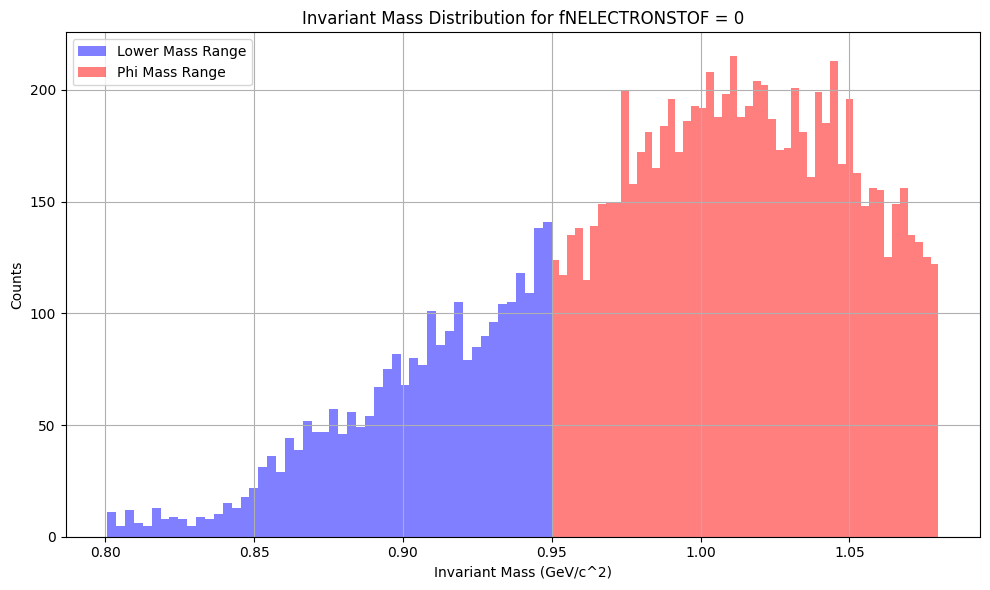

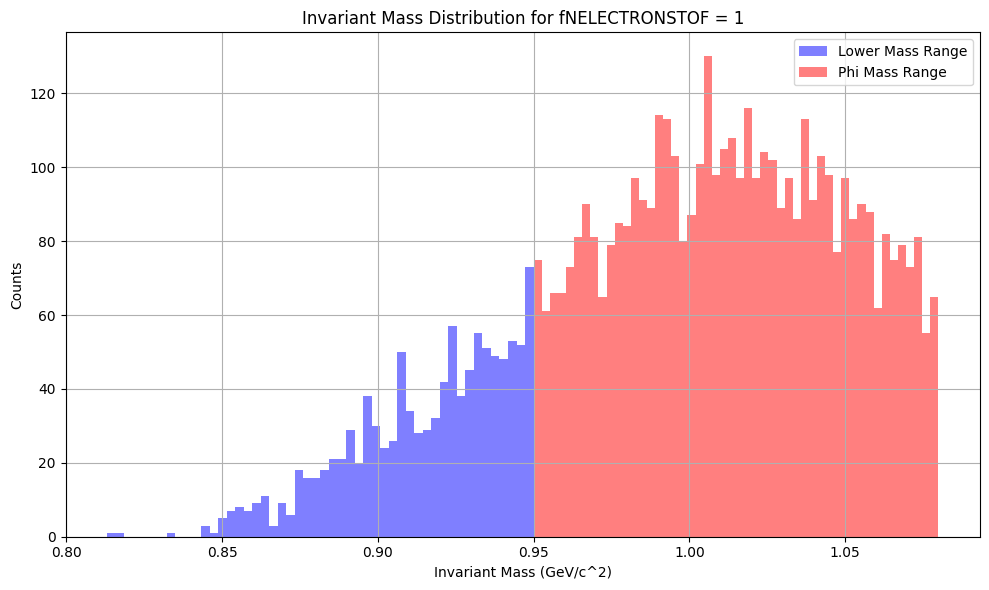

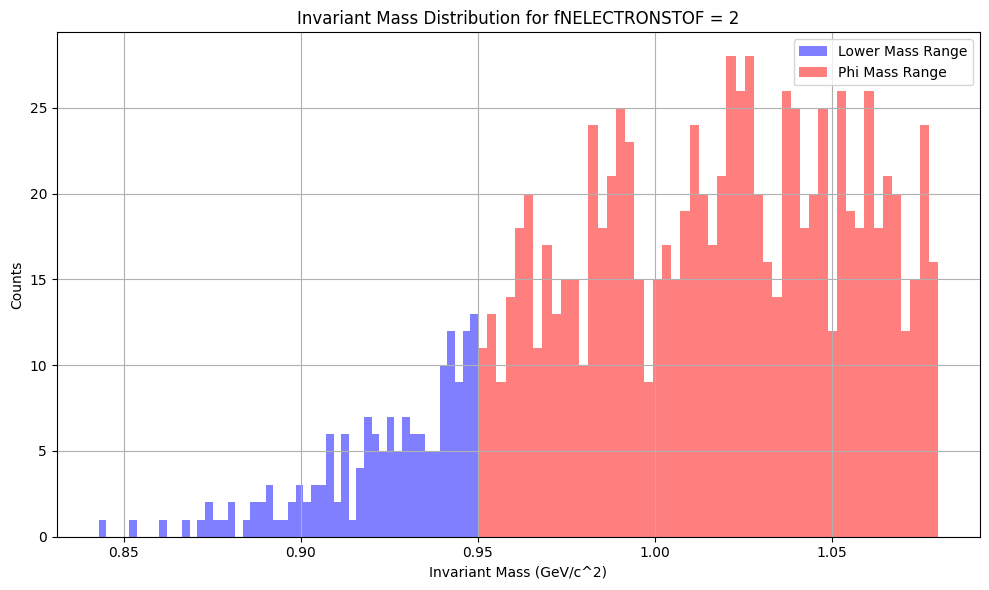

In [21]:
import matplotlib.pyplot as plt

# Function to plot invariant mass distributions
def plot_invariant_mass_distributions(filtered_lower, filtered_phi):
    """
    Plots the invariant mass distributions for the lower and phi mass ranges
    for fNELECTRONSTOF = 0, 1, and 2.

    Parameters:
    filtered_lower (list): List of DataFrames for the lower mass range.
    filtered_phi (list): List of DataFrames for the phi mass range.
    """
    for tof_value in [0, 1, 2]:
        plt.figure(figsize=(10, 6))
        # Plot lower mass range
        plt.hist(filtered_lower[tof_value]["M"], bins=50, alpha=0.5, label="Lower Mass Range", color="blue")
        # Plot phi mass range
        plt.hist(filtered_phi[tof_value]["M"], bins=50, alpha=0.5, label="Phi Mass Range", color="red")
        # Labeling
        plt.xlabel("Invariant Mass (GeV/c^2)")
        plt.ylabel("Counts")
        plt.title(f"Invariant Mass Distribution for fNELECTRONSTOF = {tof_value}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

# Plot the invariant mass distributions for the filtered DataFrames
plot_invariant_mass_distributions(df_filtered_lower, df_filtered_phi)


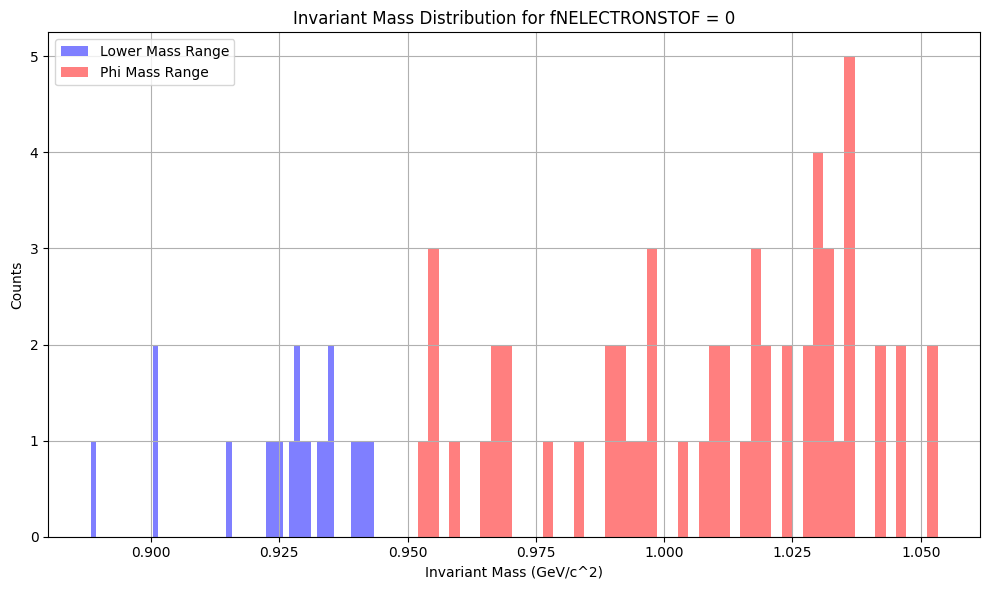

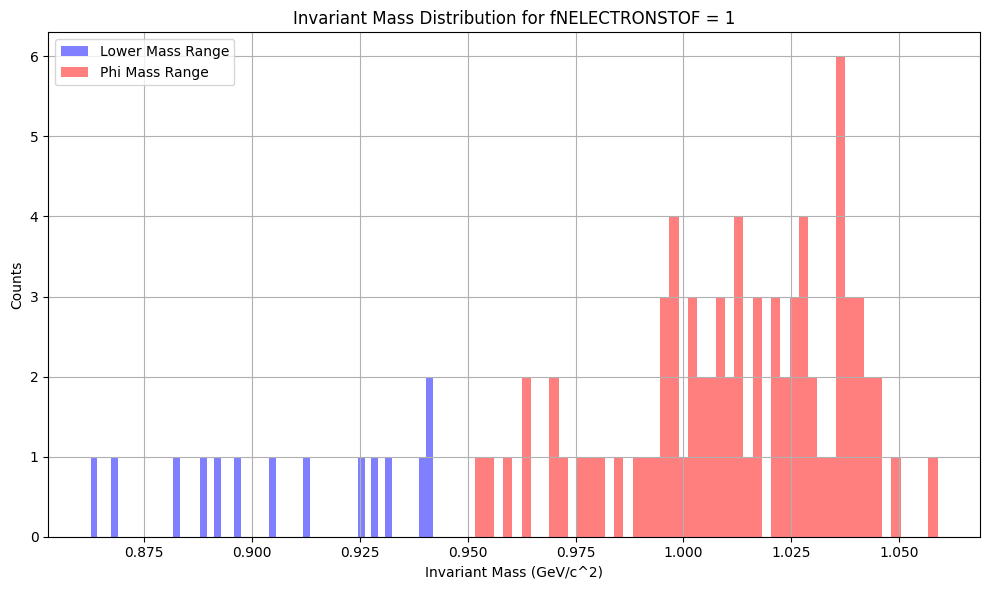

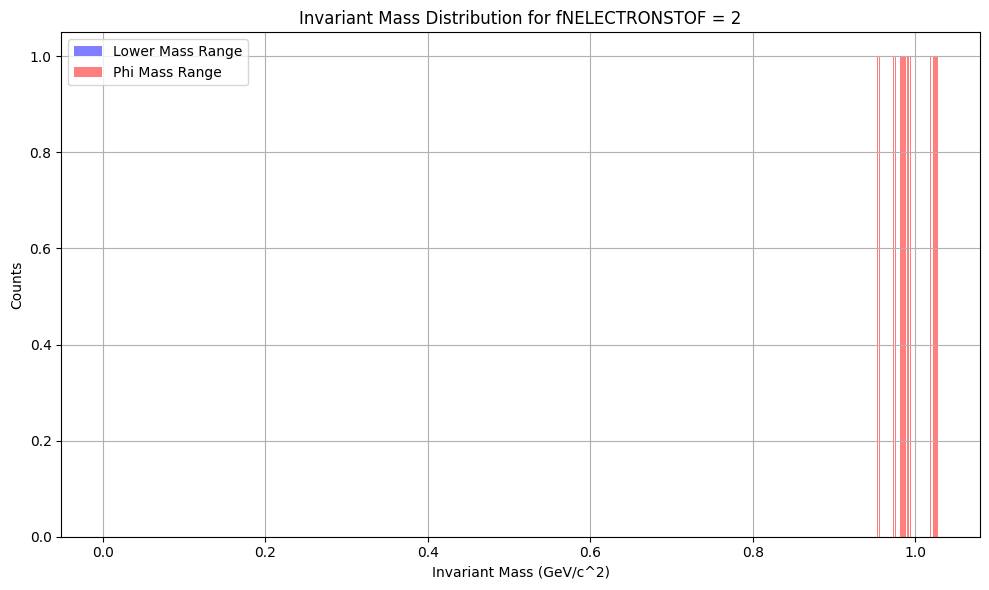

In [22]:
plot_invariant_mass_distributions(df_filtered_lower_mc, df_filtered_phi_mc)


In [23]:
print(len(df_filtered_phi_mc[0]))
print(len(df_filtered_phi_mc[1]))
print(len(df_filtered_phi_mc[2]))

56
77
16


In [24]:
# # Print the feature names used during training
# print("Feature names used during training:")
# print(rf_model_filtered.feature_names_in_)


In [25]:
import numpy as np

def create_feature_only_dataframes_from_filtered(filtered_dataframes):
    """
    Creates feature-only DataFrames from a dictionary of filtered DataFrames.

    Parameters:
    filtered_dataframes (list): List of filtered DataFrames, e.g., df_filtered_phi or df_filtered_lower.

    Returns:
    list: List of feature-only DataFrames corresponding to the input filtered DataFrames.
    """
    feature_dataframes = []

    for df in filtered_dataframes:
        # Calculate features
        dot_product = df["fPX1"] * df["fPX2"] + df["fPY1"] * df["fPY2"] + df["fPZ1"] * df["fPZ2"]
        magnitude1 = np.sqrt(df["fPX1"]**2 + df["fPY1"]**2 + df["fPZ1"]**2)
        magnitude2 = np.sqrt(df["fPX2"]**2 + df["fPY2"]**2 + df["fPZ2"]**2)
        opening_angle = np.arccos(dot_product / (magnitude1 * magnitude2))
        longitudinal_momentum_difference = abs(df["fPZ1"] - df["fPZ2"])
        energy_asymmetry = (df["fPE1"] - df["fPE2"]) / (df["fPE1"] + df["fPE2"])
        phi1 = np.arctan2(df["fPY1"], df["fPX1"])
        phi2 = np.arctan2(df["fPY2"], df["fPX2"])
        acoplanarity = 1 - np.abs(phi1 - phi2) / np.pi
        squared_momentum_difference = ((df["fPX1"] - df["fPX2"])**2 + 
                                        (df["fPY1"] - df["fPY2"])**2 + 
                                        (df["fPZ1"] - df["fPZ2"])**2)
        pt_ee = ((df["fPX1"] + df["fPX2"])**2 + (df["fPY1"] + df["fPY2"])**2)**0.5

        # Create feature-only DataFrame
        feature_df = pd.DataFrame({
            "pT (e+e-)": pt_ee,
            "Acoplanarity": acoplanarity,
            "Squared Momentum Difference": squared_momentum_difference,
            "Longitudinal Momentum Difference": longitudinal_momentum_difference,
            "Energy Asymmetry": energy_asymmetry,
            "Opening Angle": opening_angle,
        })
        feature_dataframes.append(feature_df)

    return feature_dataframes

# Example usage
df_features_lower = create_feature_only_dataframes_from_filtered(df_filtered_lower)
df_features_phi = create_feature_only_dataframes_from_filtered(df_filtered_phi)

# Print the number of rows in each subset for verification
for i, feature_df in enumerate(df_features_lower):
    print(f"Number of events in df_features_lower[{i}]: {len(feature_df)}")
    print(feature_df.head())

for i, feature_df in enumerate(df_features_phi):
    print(f"Number of events in df_features_phi[{i}]: {len(feature_df)}")
    print(feature_df.head())


Number of events in df_features_lower[0]: 2662
     pT (e+e-)  Acoplanarity  Squared Momentum Difference  \
208   0.034565      0.002181                     0.773668   
219   0.467415      0.317713                     0.890660   
265   0.058244      0.039533                     0.873966   
290   0.015489     -0.000985                     0.839626   
335   0.068220      0.001970                     0.844626   

     Longitudinal Momentum Difference  Energy Asymmetry  Opening Angle  
208                          0.047632          0.050980       1.844700  
219                          0.395031          0.065097       2.192043  
265                          0.089350          0.038958       1.970661  
290                          0.028246         -0.000131       2.150417  
335                          0.095113          0.014994       2.163854  
Number of events in df_features_lower[1]: 1085
     pT (e+e-)  Acoplanarity  Squared Momentum Difference  \
5     0.032446     -0.019543            

In [26]:
df_features_phi[1].head()

,pT (e+e-),Acoplanarity,Squared Momentum Difference,Longitudinal Momentum Difference,Energy Asymmetry,Opening Angle
118,0.060145,-0.023117,0.948296,0.187447,-0.029379,2.910142
179,0.019302,-0.001904,0.973502,0.107373,-0.031845,2.907914
206,0.023464,-0.012040,1.063063,0.027227,0.006169,2.681472
269,0.004968,-0.002808,1.058361,0.448702,-0.018444,3.077524
376,0.067742,-0.005741,1.095748,0.450032,0.075423,3.117129


In [35]:
df_features_lower_mc = create_feature_only_dataframes_from_filtered(df_filtered_lower_mc)
df_features_phi_mc = create_feature_only_dataframes_from_filtered(df_filtered_phi_mc)

# Print the number of rows in each subset for verification
for i, feature_df in enumerate(df_features_lower_mc):
    print(f"Number of events in df_features_lower[{i}]: {len(feature_df)}")
    print(feature_df.head())

for i, feature_df in enumerate(df_features_phi_mc):
    print(f"Number of events in df_features_phi[{i}]: {len(feature_df)}")
    print(feature_df.head())


Number of events in df_features_lower[0]: 20
     pT (e+e-)  Acoplanarity  Squared Momentum Difference  \
11    0.062587     -0.030048                     0.869806   
68    0.148974      0.099293                     0.852730   
88    0.026349     -0.005057                     0.816145   
91    0.063414     -0.024859                     0.875284   
128   0.013153     -0.003546                     0.840309   

     Longitudinal Momentum Difference  Energy Asymmetry  Opening Angle  
11                           0.084404         -0.012918       1.848444  
68                           0.014045         -0.015177       1.785248  
88                           0.078260         -0.059437       1.987116  
91                           0.097745          0.009485       1.969730  
128                          0.066005         -0.042299       1.984056  
Number of events in df_features_lower[1]: 14
     pT (e+e-)  Acoplanarity  Squared Momentum Difference  \
29    0.049470      0.033760                

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os

def analyze_phi_predictions(feature_dataframes, original_df, model, output_folder='betterAnalysis'):
    """
    Passes feature DataFrames through the model, separates predictions into signal and background,
    and plots the invariant mass and pT distributions for both signal and background, as well as a 2D
    plot of invariant mass vs pT for predicted signal. Adds an extra plot for invariant mass distribution
    if pT > 0.3 GeV. This function focuses only on `df_features_phi`.

    Parameters:
    feature_dataframes (list): List containing prepared feature DataFrames for `df_features_phi`.
    original_df (list): List containing the corresponding original DataFrames (`df_filtered_phi`).
    model: Trained Random Forest model.
    output_folder (str): Folder to save the generated plots.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Ensure feature alignment
    expected_features = model.feature_names_in_

    for i, features_df in enumerate(feature_dataframes):
        # Align test DataFrame with training features
        features_df = features_df[expected_features]
        
        # Predict signal (phi) vs background
        predictions = model.predict(features_df)
        
        # Retrieve the corresponding events from the original DataFrame
        filtered_df = original_df[i].copy()
        
        # Add predictions to the filtered original DataFrame
        filtered_df["Prediction"] = predictions
        
        # Separate predicted signal and background
        signal_df = filtered_df[filtered_df["Prediction"] == 1]
        background_df = filtered_df[filtered_df["Prediction"] == 0]
        
        # Compute invariant mass
        def compute_invariant_mass(df):
            if df.empty:
                return np.array([])  # Return an empty array if the DataFrame is empty
            total_energy = df["fPE1"] + df["fPE2"]
            total_px = df["fPX1"] + df["fPX2"]
            total_py = df["fPY1"] + df["fPY2"]
            total_pz = df["fPZ1"] + df["fPZ2"]
            total_p = np.sqrt(total_px**2 + total_py**2 + total_pz**2)
            return np.sqrt(total_energy**2 - total_p**2)
        
        signal_invariant_mass = compute_invariant_mass(signal_df)
        background_invariant_mass = compute_invariant_mass(background_df)

        # Compute transverse momentum (pT)
        signal_pt = np.sqrt((signal_df["fPX1"] + signal_df["fPX2"])**2 + (signal_df["fPY1"] + signal_df["fPY2"])**2)
        background_pt = np.sqrt((background_df["fPX1"] + background_df["fPX2"])**2 + (background_df["fPY1"] + background_df["fPY2"])**2)

        # Filter for invariant mass if pT > 0.3 GeV
        signal_pt_cut = signal_df[signal_pt > 0.3]
        background_pt_cut = background_df[background_pt > 0.3]
        signal_invariant_mass_pt_cut = compute_invariant_mass(signal_pt_cut)
        background_invariant_mass_pt_cut = compute_invariant_mass(background_pt_cut)

        # Plot invariant mass distributions with fine binning
        if len(signal_invariant_mass) > 0 or len(background_invariant_mass) > 0:
            plt.figure(figsize=(10, 6))
            bins = np.arange(0.9, 1.1, 0.002)  # Fine binning: 5 MeV bins
            if len(signal_invariant_mass) > 0:
                plt.hist(signal_invariant_mass, bins=bins, color='blue', alpha=0.5, label='Predicted Signal (\u03D5(1020))', density=True)
            if len(background_invariant_mass) > 0:
                plt.hist(background_invariant_mass, bins=bins, color='red', alpha=0.5, label='Predicted Background', density=True)
            plt.xlabel("Invariant Mass (GeV/c$^2$)")
            plt.ylabel("Counts / bin")
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.savefig(f"{output_folder}/invariant_mass_phi_{i}.pdf")
            plt.close()

        # Plot pT distributions
        if len(signal_pt) > 0 or len(background_pt) > 0:
            plt.figure(figsize=(10, 6))
            bins = np.linspace(0, 0.15, 50)  # Adjust binning for better resolution
            if len(signal_pt) > 0:
                plt.hist(signal_pt, bins=bins, color='blue', alpha=0.5, label='Predicted Signal (\u03D5(1020))', density=True)
            if len(background_pt) > 0:
                plt.hist(background_pt, bins=bins, color='red', alpha=0.5, label='Predicted Background', density=True)
            plt.xlabel("Transverse Momentum $p_T$ (GeV/c)")
            plt.ylabel("Counts / bin")
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.savefig(f"{output_folder}/pt_phi_{i}.pdf")
            plt.close()

        # 2D plot: invariant mass vs pT for predicted signal
        if len(signal_invariant_mass) > 0 and len(signal_pt) > 0:
            plt.figure(figsize=(10, 8))
            plt.hist2d(signal_invariant_mass, signal_pt, bins=(50, 50), cmap='viridis')
            plt.colorbar(label="Counts")
            plt.xlabel("Invariant Mass (GeV/c$^2$)")
            plt.ylabel("Transverse Momentum $p_T$ (GeV/c)")
            plt.title("Predicted Signal (\u03D5(1020))")
            plt.tight_layout()
            plt.savefig(f"{output_folder}/invariant_mass_vs_pt_phi_{i}.pdf")
            plt.close()

        # Plot invariant mass distributions for events with pT > 0.3 GeV
        if len(signal_invariant_mass_pt_cut) > 0 or len(background_invariant_mass_pt_cut) > 0:
            plt.figure(figsize=(10, 6))
            bins = np.arange(0.9, 1.1, 0.002)  # Fine binning: 5 MeV bins
            if len(signal_invariant_mass_pt_cut) > 0:
                plt.hist(signal_invariant_mass_pt_cut, bins=bins, color='blue', alpha=0.5, label='Predicted Signal (\u03D5(1020)) with $p_T > 0.3$ GeV', density=True)
            if len(background_invariant_mass_pt_cut) > 0:
                plt.hist(background_invariant_mass_pt_cut, bins=bins, color='red', alpha=0.5, label='Predicted Background with $p_T > 0.3$ GeV', density=True)
            plt.xlabel("Invariant Mass (GeV/c$^2$)")
            plt.ylabel("Counts / bin")
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.savefig(f"{output_folder}/invariant_mass_pt_cut_phi_{i}.pdf")
            plt.close()

    print(f"Plots saved to folder: {output_folder}")


In [28]:
# Example usage
# analyze_phi_predictions(df_features_phi, df_filtered_phi, rf_model_filtered)


### Mixed model: ALICE sidebands, STARlight phi

In [29]:
import matplotlib.pyplot as plt

def plot_features(features_df):
    """
    Plots histograms for each feature in the features DataFrame.
    
    Parameters:
    features_df (pd.DataFrame): DataFrame containing computed features for each event.
    """
    # Set up a figure with subplots for each feature
    n_features = features_df.shape[1] - 1  # Exclude the 'Event Number' column
    fig, axs = plt.subplots(n_features, 1, figsize=(10, 4 * n_features))
    
    # Plot each feature in a separate subplot
    for i, col in enumerate(features_df.columns[1:]):  # Skip 'Event Number' column
        axs[i].hist(features_df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f"Distribution of {col}")
        axs[i].set_xlabel(col)
        axs[i].set_ylabel("Counts")
    
    plt.tight_layout()
    plt.show()


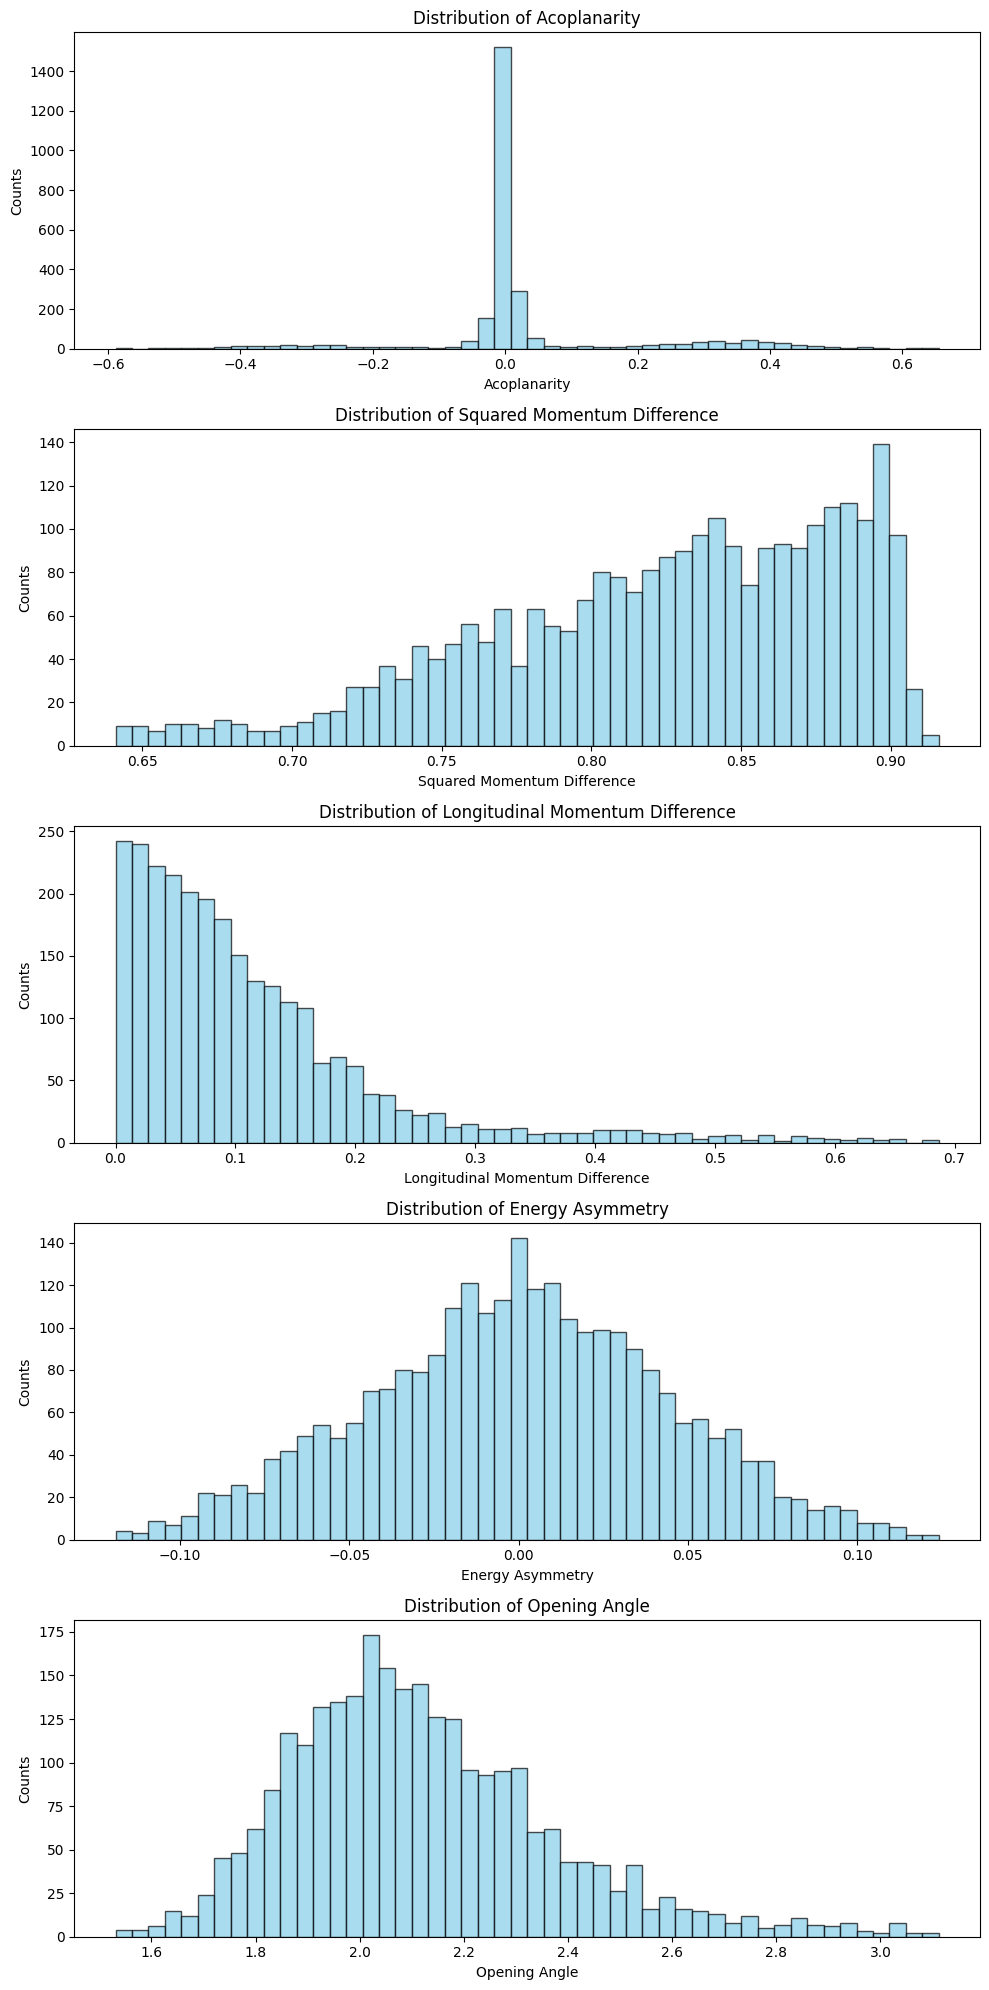

In [30]:
plot_features(df_features_lower[0])

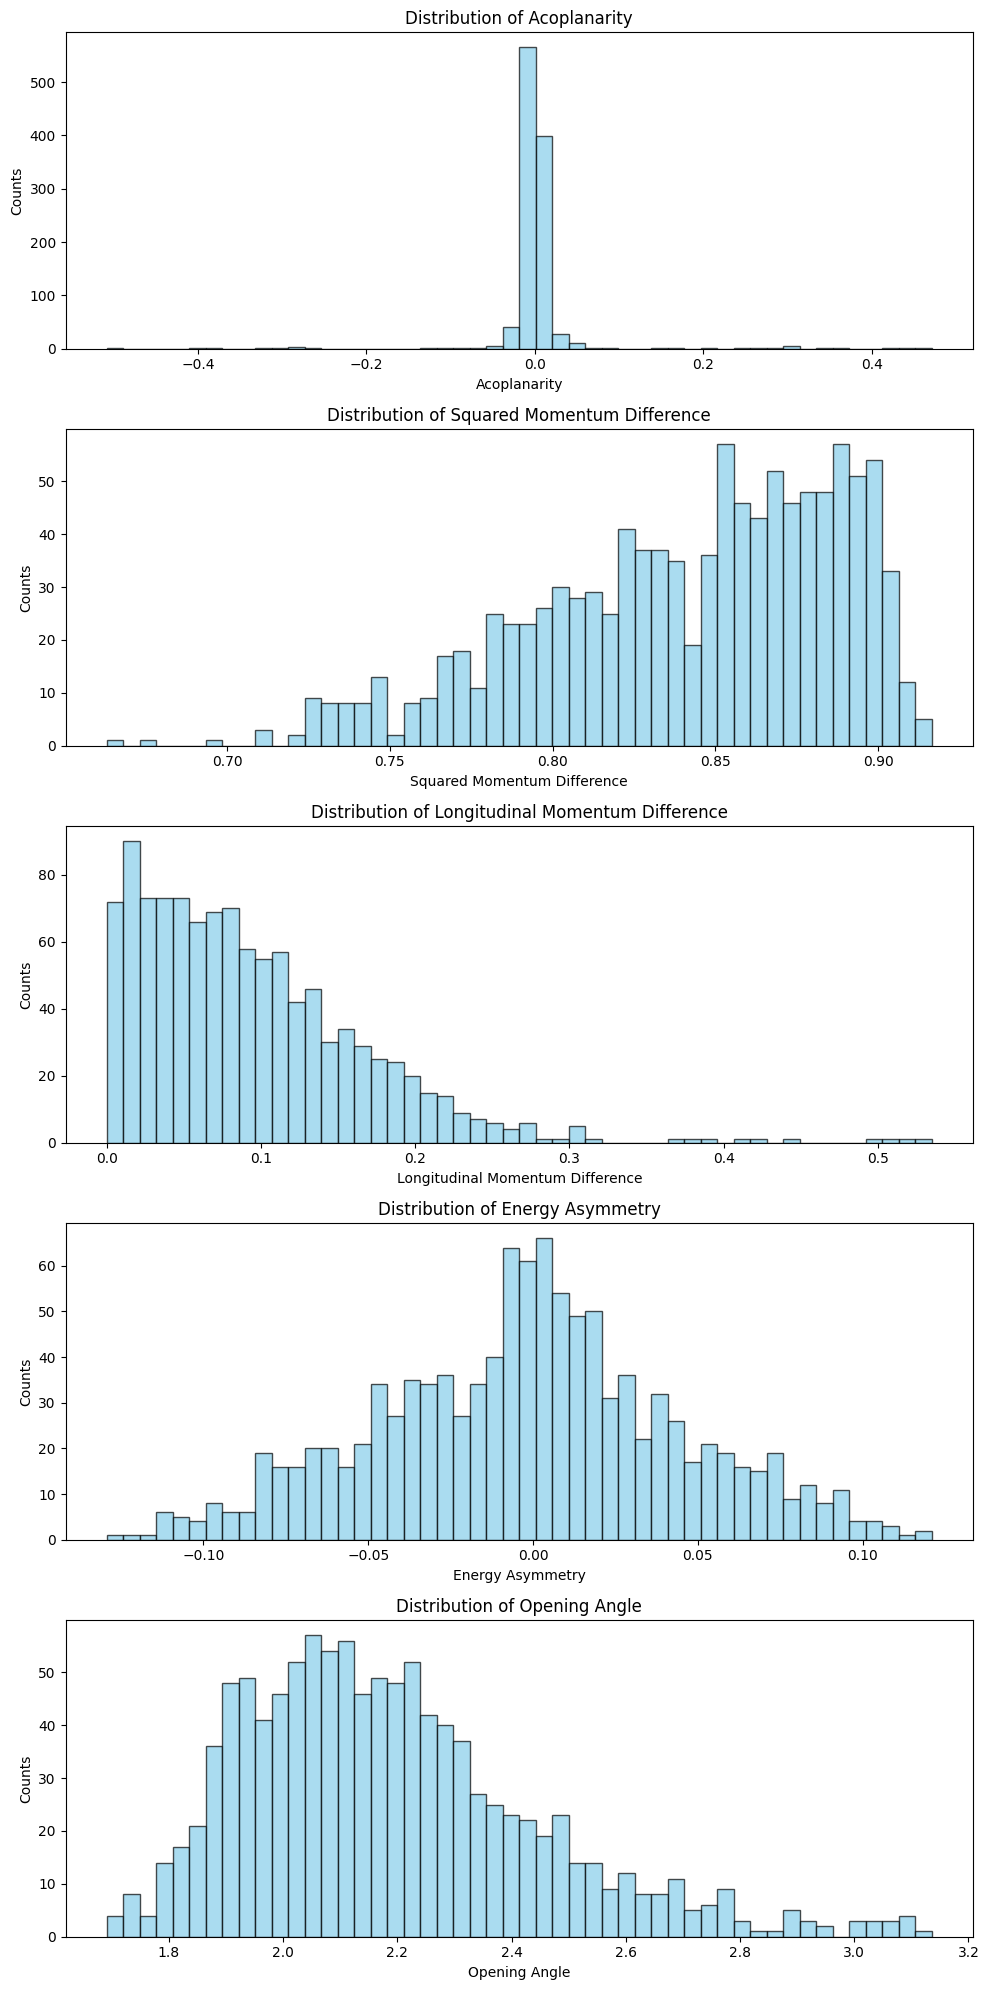

In [31]:
plot_features(df_features_lower[1])

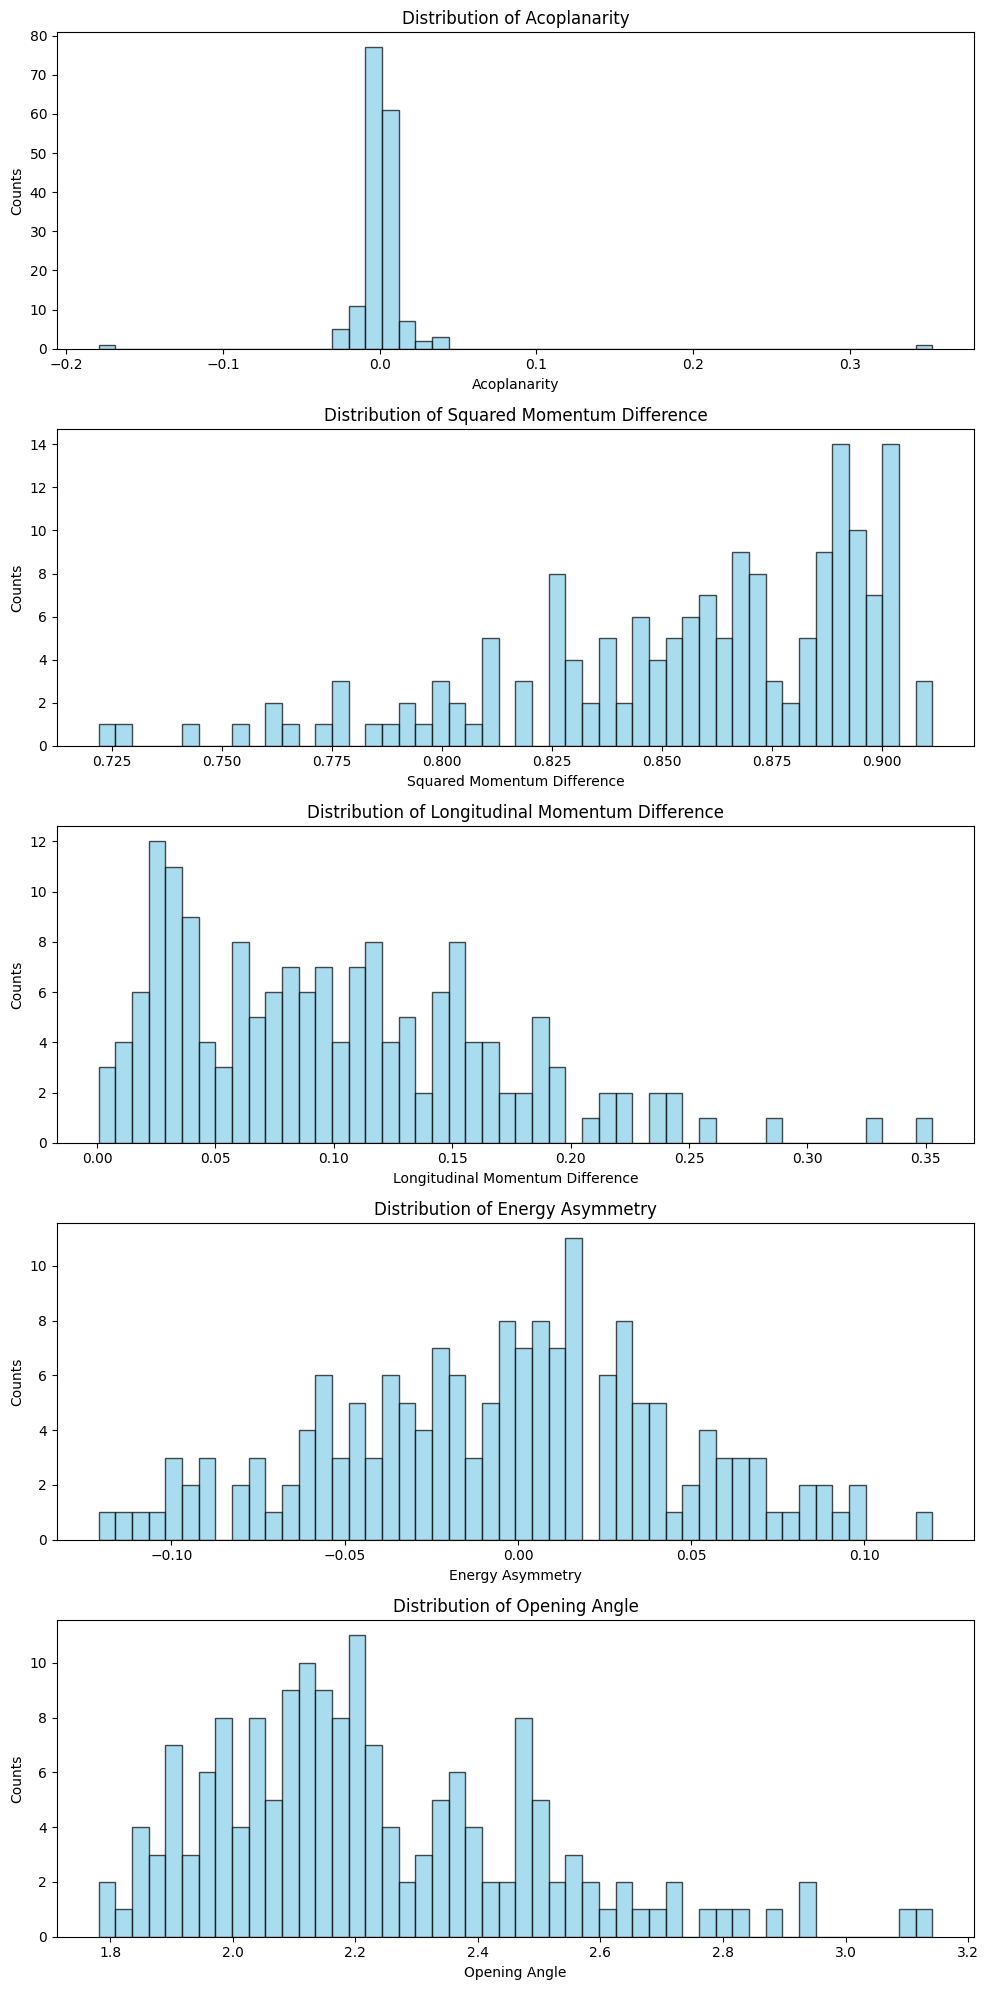

In [32]:
plot_features(df_features_lower[2])

In [33]:
df_features_lower[0].head()

,pT (e+e-),Acoplanarity,Squared Momentum Difference,Longitudinal Momentum Difference,Energy Asymmetry,Opening Angle
208,0.034565,0.002181,0.773668,0.047632,0.050980,1.844700
219,0.467415,0.317713,0.890660,0.395031,0.065097,2.192043
265,0.058244,0.039533,0.873966,0.089350,0.038958,1.970661
290,0.015489,-0.000985,0.839626,0.028246,-0.000131,2.150417
335,0.068220,0.001970,0.844626,0.095113,0.014994,2.163854


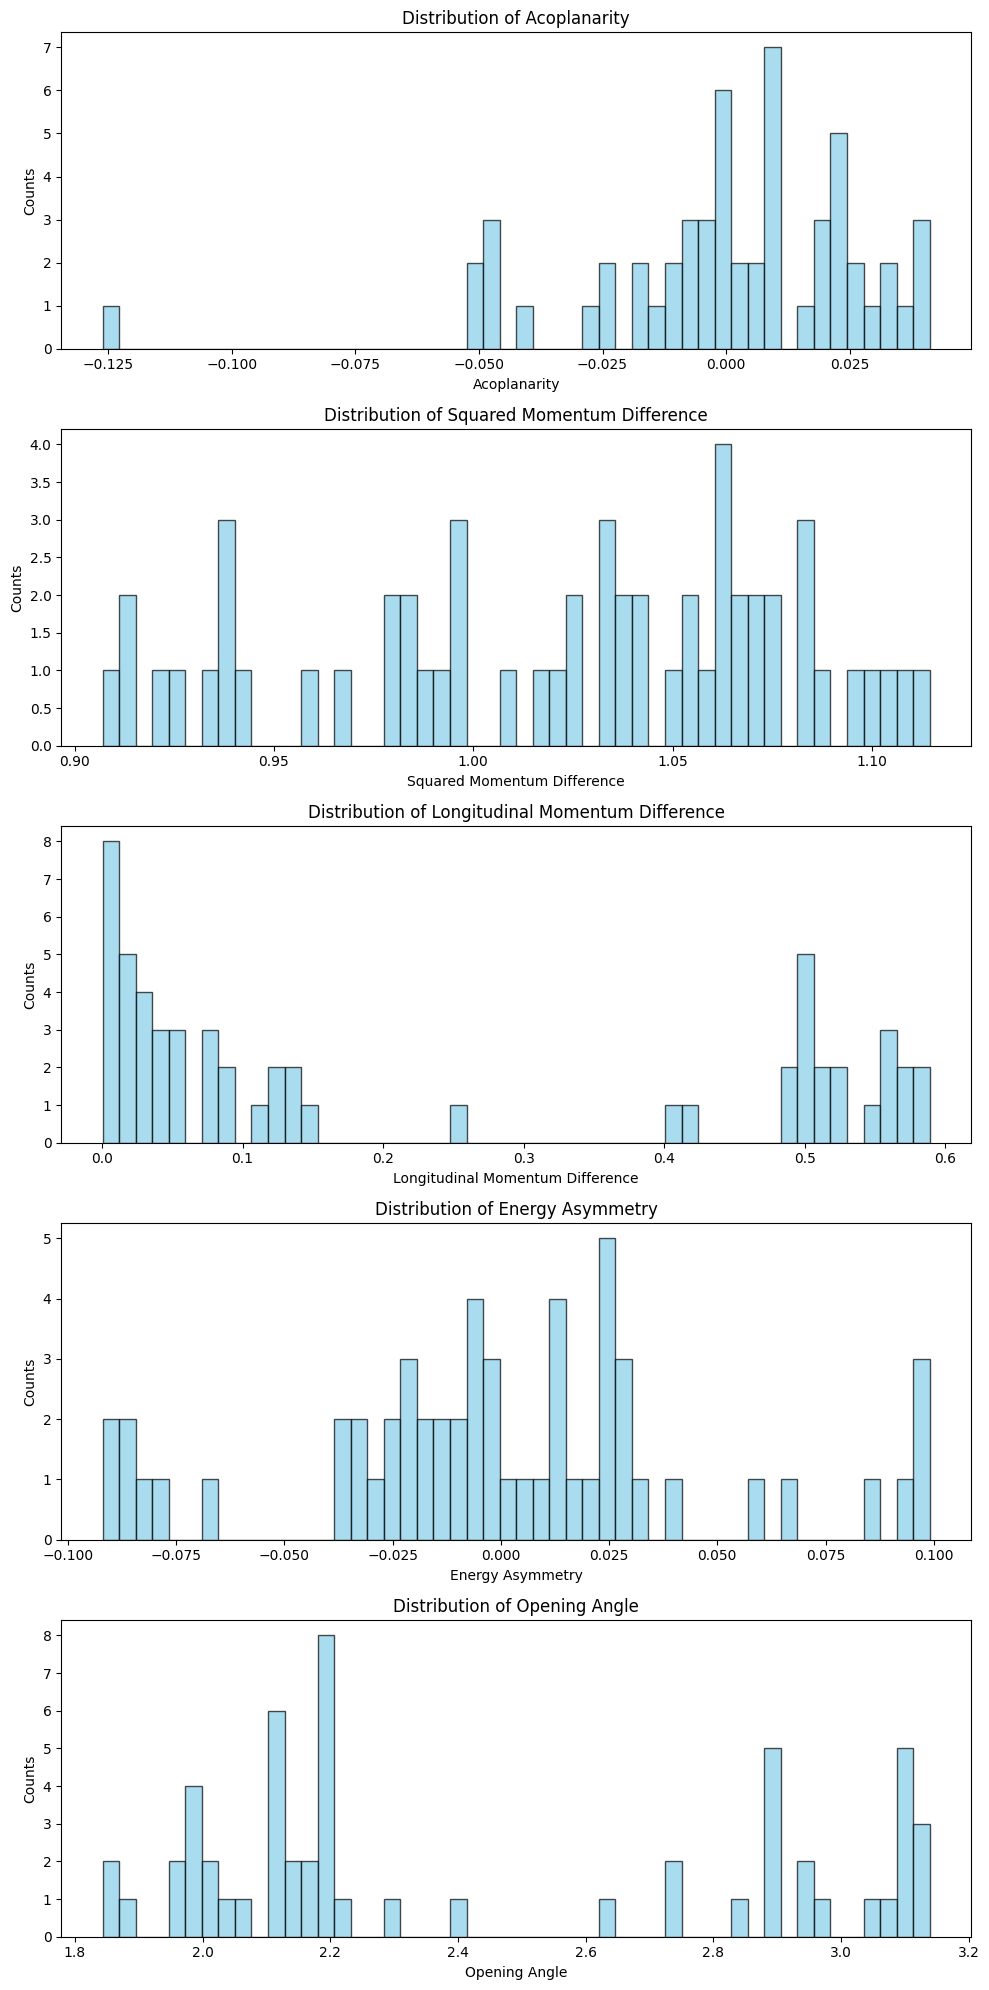

In [36]:
plot_features(df_features_phi_mc[0])

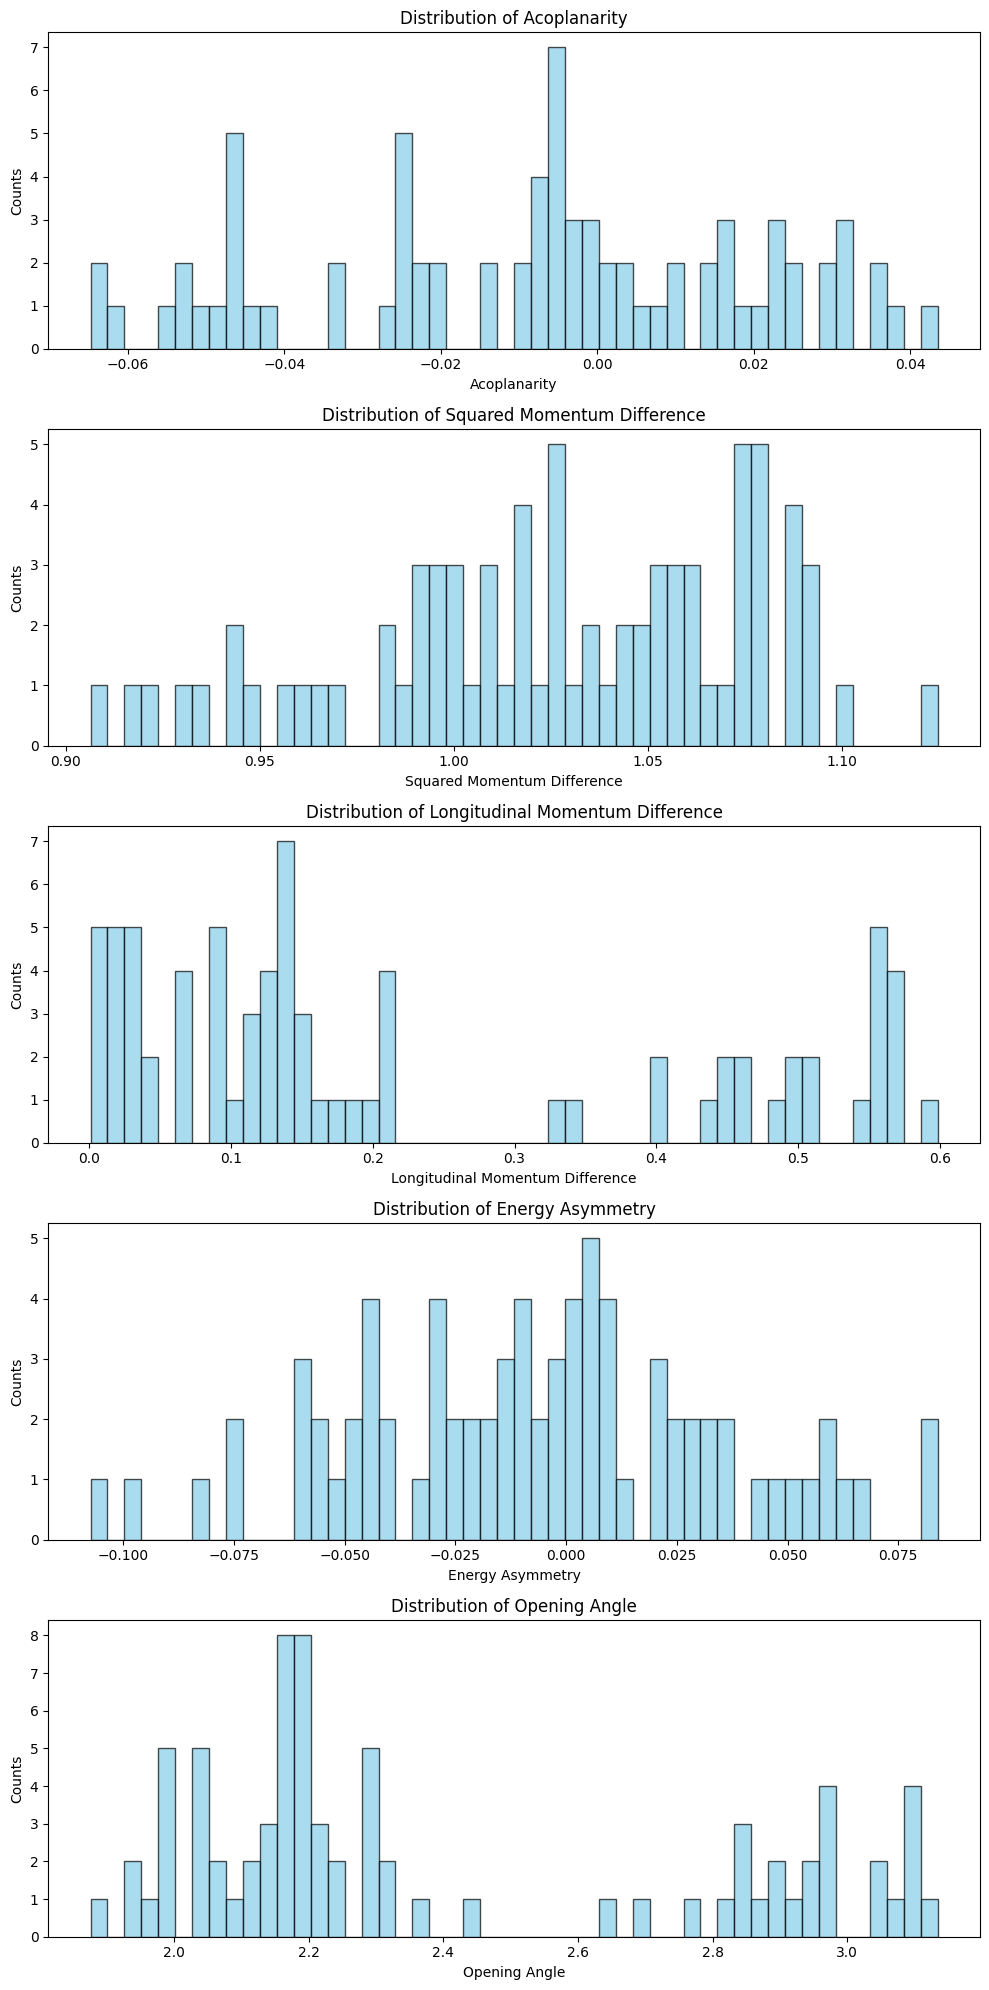

In [37]:
plot_features(df_features_phi_mc[1])

In [ ]:
# Keep this one for now so that we can interrupt it before training a model

features_df.head()

NameError: name 'features_df' is not defined

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt


def prepare_training_data(phi_features_df, background_features_df):
    """
    Prepares the combined dataset with labels for training.
    - phi_features_df: DataFrame with features for phi -> e+ e- events (signal, label 1)
    - background_features_df: DataFrame with features for background events (label 0)
    
    Returns:
    X, y: Feature matrix and labels
    """
    # Assign labels
    phi_features_df['Label'] = 1  # Signal
    background_features_df['Label'] = 0  # Background
    
    # Combine datasets
    combined_df = pd.concat([phi_features_df, background_features_df], ignore_index=True)
    
    # Separate features and labels
    X = combined_df.drop(columns=['Label'])  # Drop the label column
    y = combined_df['Label']
    
    return X, y


In [ ]:
def train_random_forest(phi_features_df, background_features_df):
    """
    Trains a Random Forest classifier on the given data and evaluates its performance.
    
    Parameters:
    phi_features_df (pd.DataFrame): DataFrame with features for phi -> e+ e- events (signal, label 1)
    background_features_df (pd.DataFrame): DataFrame with features for background events (label 0)
    
    Returns:
    model: Trained Random Forest model
    """
    # Prepare training data
    X, y = prepare_training_data(phi_features_df, background_features_df)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    feature_importances = rf_model.feature_importances_
    feature_names = X_train.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances, color='skyblue')
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    
    return rf_model


In [ ]:
len(features_df)

10000

In [ ]:
len(df_features_lower[0])

2662

Accuracy: 1.000
ROC-AUC: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       768
           1       1.00      1.00      1.00      3031

    accuracy                           1.00      3799
   macro avg       1.00      1.00      1.00      3799
weighted avg       1.00      1.00      1.00      3799



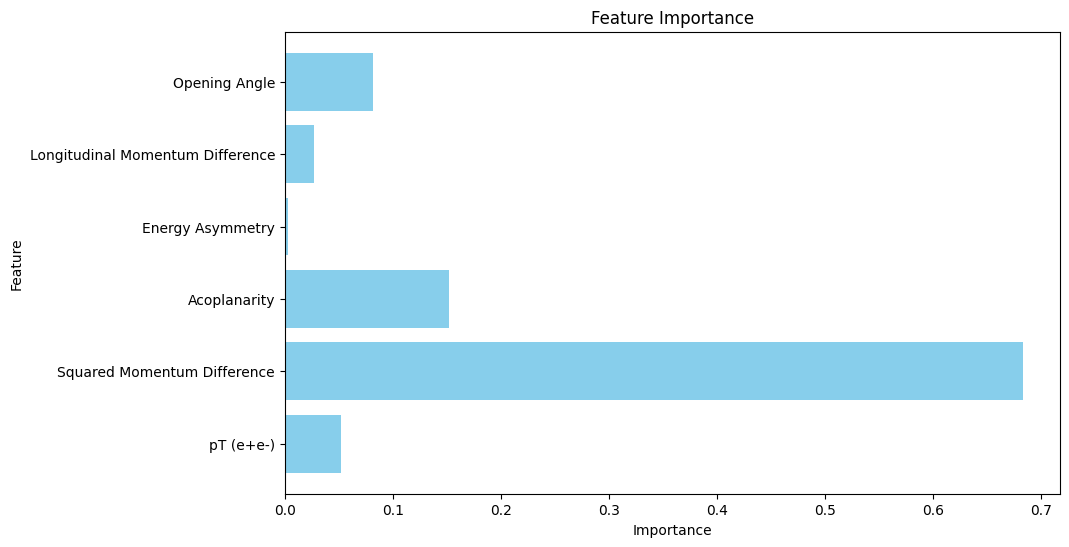

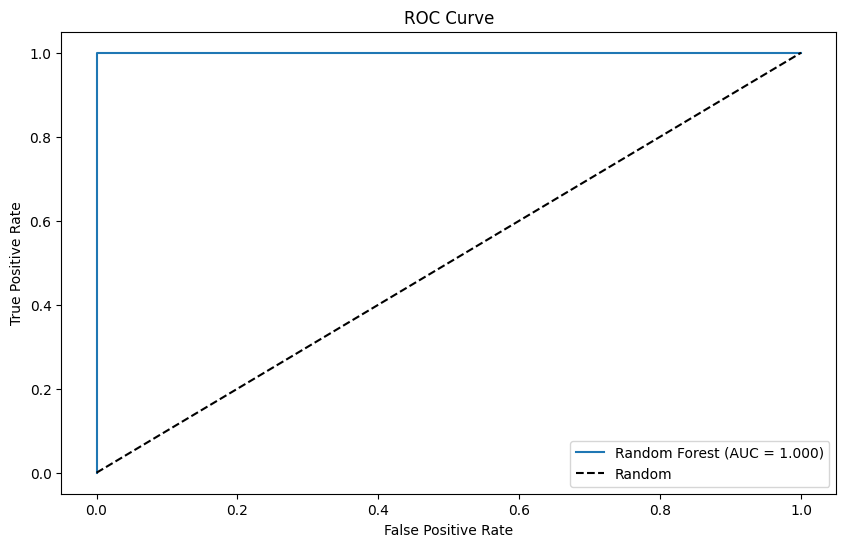

In [ ]:
# Prepare the STARlight phi(1020) dataset
phi_df = features_df.drop(columns=['Event Number', 'Invariant Mass'])  # Drop unnecessary columns

# Train the model with STARlight signal and ALICE background
rf_model = train_random_forest(phi_df, df_features_lower[0])


In [ ]:
# Example usage
analyze_phi_predictions(df_features_phi, df_filtered_phi, rf_model)


Plots saved to folder: betterAnalysis


### Adapting to use with only 150 training events...

Let's try with logistic regression first

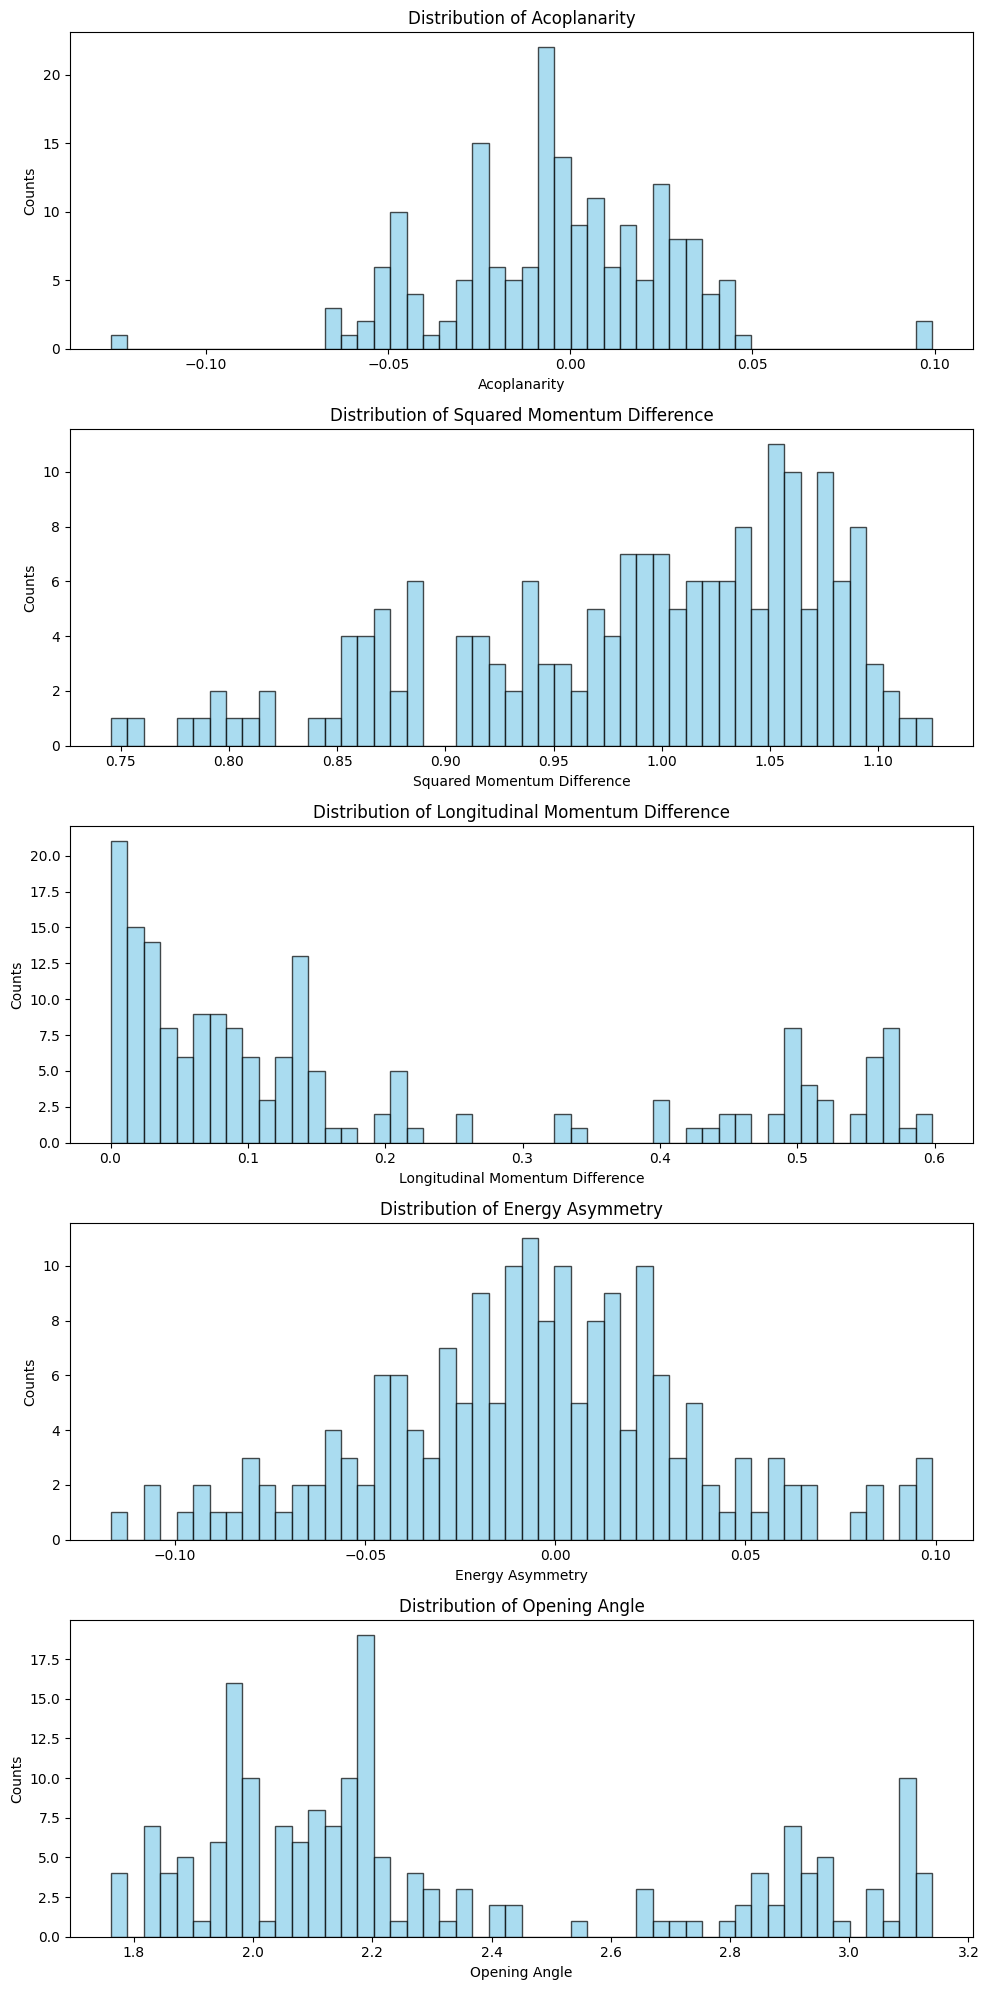

In [47]:
# df_features_phi_mc_combined = pd.concat([df_features_phi_mc[0], df_features_phi_mc[1], df_features_phi_mc[2]], ignore_index=True)
df_features_phi_mc_combined = pd.concat([df_features_phi_mc[0], df_features_phi_mc[1], df_features_phi_mc[2],
                                         df_features_lower_mc[0], df_features_lower_mc[1], df_features_lower_mc[2]], ignore_index=False)
df_features_phi_mc_combined
plot_features(df_features_phi_mc_combined)

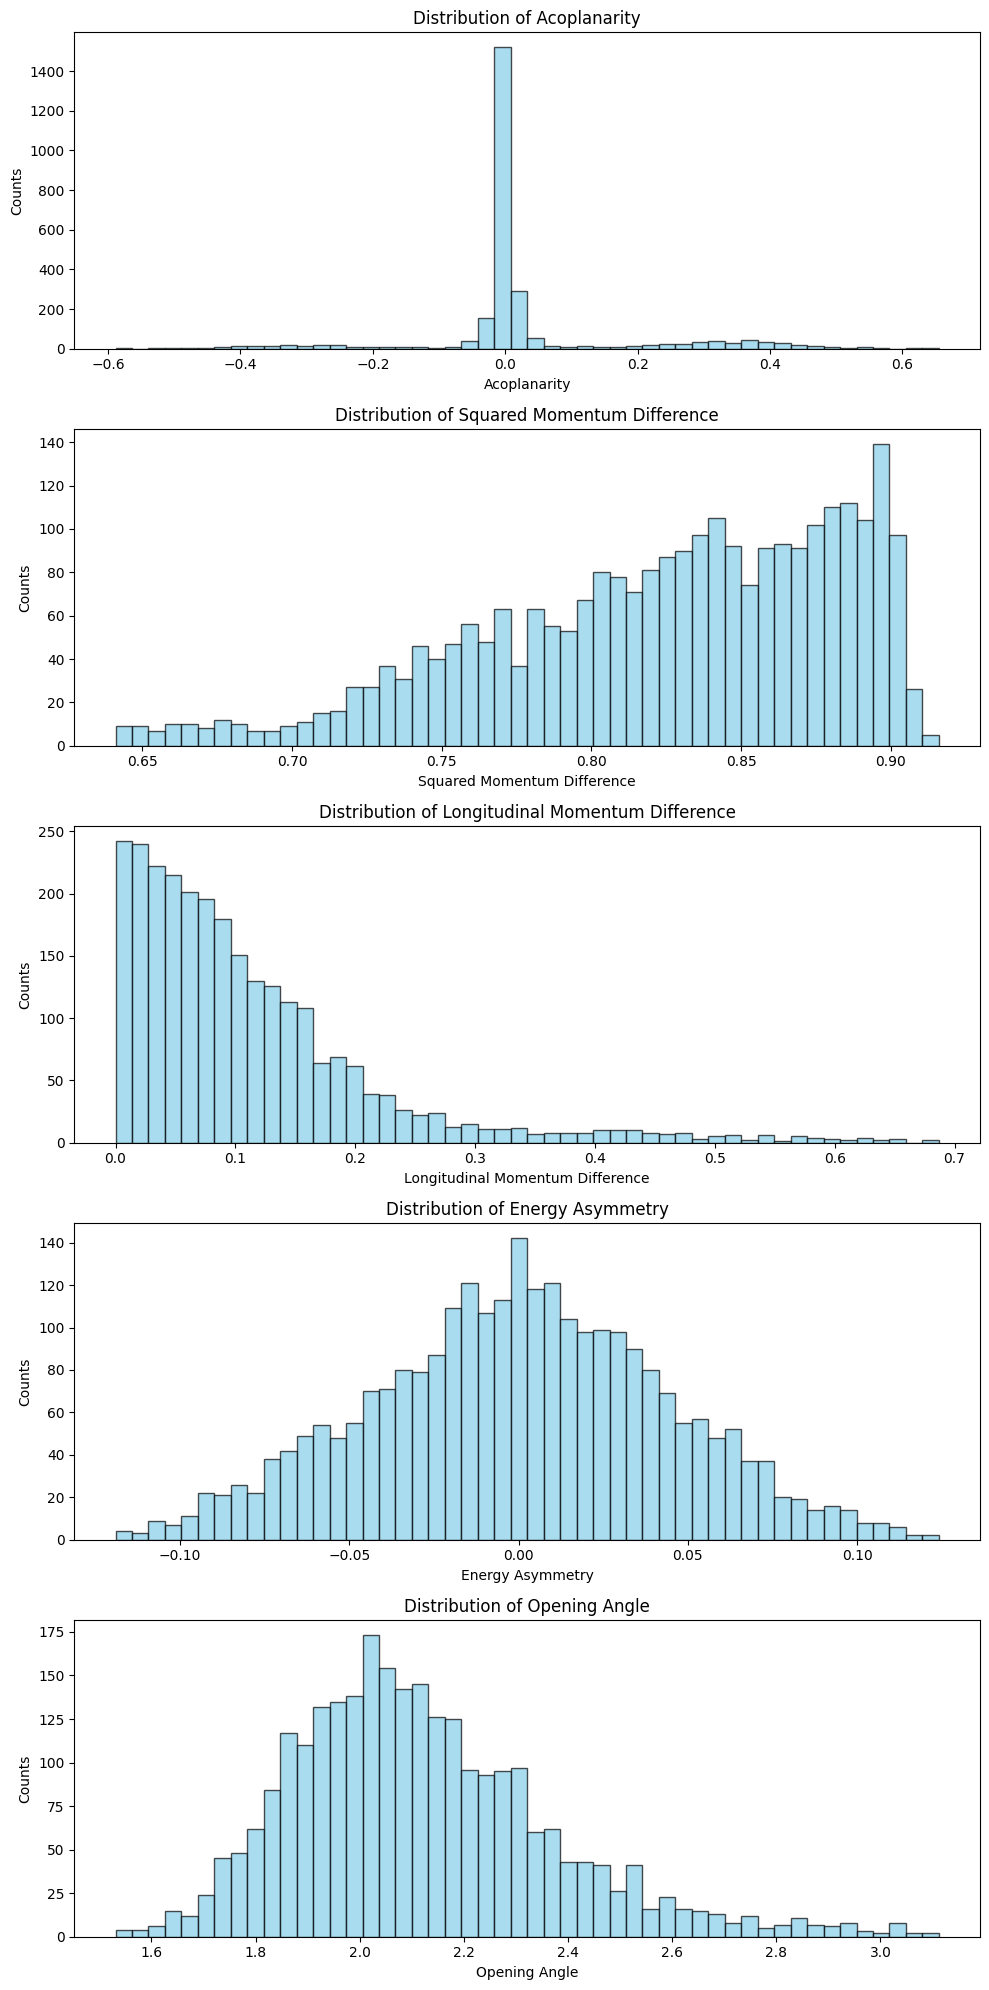

In [48]:
plot_features(df_features_lower[0])

In [49]:
df_features_phi_mc_combined


,pT (e+e-),Acoplanarity,Squared Momentum Difference,Longitudinal Momentum Difference,Energy Asymmetry,Opening Angle
0,0.019825,-0.008216,0.934312,0.047933,-0.033939,1.970621
8,0.001742,-0.000209,1.109447,0.512141,0.000168,3.134252
25,0.038365,0.025378,0.913423,0.005629,-0.005777,1.887429
36,0.013333,-0.009493,1.035115,0.501563,-0.009636,3.104464
72,0.064090,0.017917,1.040940,0.031206,0.029309,2.105200
...,...,...,...,...,...,...
554,0.054217,-0.025648,0.845996,0.149882,-0.105918,1.969714
658,0.072586,0.043146,0.793630,0.031748,-0.047574,1.950956
686,0.075920,-0.022057,0.887639,0.019852,-0.060510,1.976255
692,0.052749,0.030182,0.818521,0.025489,-0.008053,1.844300


In [50]:
df_features_lower[0]

,pT (e+e-),Acoplanarity,Squared Momentum Difference,Longitudinal Momentum Difference,Energy Asymmetry,Opening Angle
208,0.034565,0.002181,0.773668,0.047632,0.050980,1.844700
219,0.467415,0.317713,0.890660,0.395031,0.065097,2.192043
265,0.058244,0.039533,0.873966,0.089350,0.038958,1.970661
290,0.015489,-0.000985,0.839626,0.028246,-0.000131,2.150417
335,0.068220,0.001970,0.844626,0.095113,0.014994,2.163854
...,...,...,...,...,...,...
185360,0.545871,-0.352031,0.783249,0.032207,0.001031,2.014241
185414,0.008537,0.001020,0.800847,0.010452,0.012096,2.081958
185461,0.652282,-0.447339,0.766210,0.415906,0.028770,1.855126
185475,0.383626,-0.278383,0.672185,0.028080,-0.004085,1.707701


In [46]:
df_features_phi[0]

,pT (e+e-),Acoplanarity,Squared Momentum Difference,Longitudinal Momentum Difference,Energy Asymmetry,Opening Angle
0,0.015648,-0.003138,1.090419,0.357582,0.012839,2.987483
3,0.014267,-0.004586,1.005940,0.047526,0.028804,2.212527
21,0.059545,-0.037489,1.014056,0.328856,-0.039487,2.770212
26,0.007984,0.005094,1.108337,0.484120,0.004554,3.109190
52,0.054166,0.034650,0.913605,0.003061,0.014949,2.867845
...,...,...,...,...,...,...
185413,0.278121,-0.180925,1.006742,0.347978,-0.008126,2.531376
185425,0.015204,-0.010246,0.968541,0.298155,0.052422,2.790624
185426,0.017748,-0.002739,0.992452,0.222898,0.021046,3.111753
185456,0.020023,0.003556,1.078379,0.094637,0.020543,2.248528


Accuracy: 0.973
ROC-AUC: 0.964

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       807
           1       1.00      0.51      0.68        47

    accuracy                           0.97       854
   macro avg       0.99      0.76      0.83       854
weighted avg       0.97      0.97      0.97       854



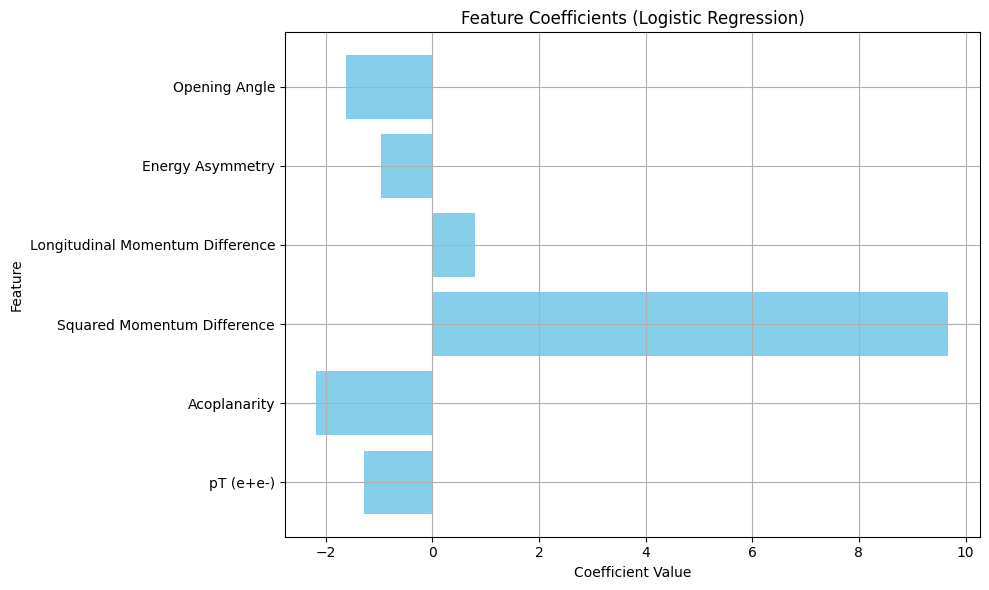

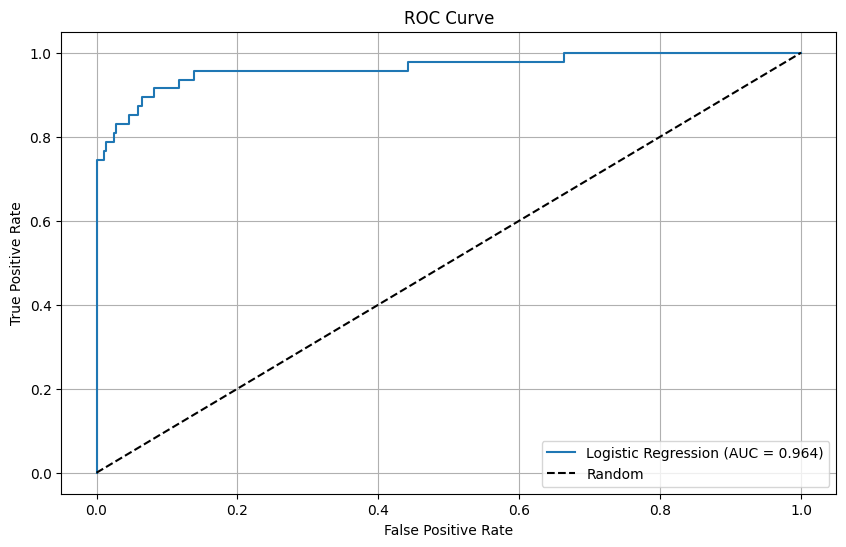

In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np


def prepare_training_data(df_features_phi_mc_combined, background_features_df):
    """
    Prepares the combined dataset with labels for training.
    - phi_features_dict: Dictionary of DataFrames for phi -> e+ e- events (signal, label 1)
    - background_features_df: DataFrame with features for background events (label 0)
    
    Returns:
    X, y: Feature matrix and labels
    """
    # Combine all phi features into one DataFrame and assign labels
    # phi_features_df = pd.concat(phi_features_dict.values(), ignore_index=True)
    df_features_phi_mc_combined['Label'] = 1  # Signal
    
    # Background features
    background_features_df = background_features_df.copy()
    background_features_df['Label'] = 0  # Background
    
    # Combine datasets
    combined_df = pd.concat([df_features_phi_mc_combined, background_features_df], ignore_index=True)
    
    # Separate features and labels
    X = combined_df.drop(columns=['Label'])  # Drop the label column
    y = combined_df['Label']
    
    return X, y


def train_logistic_regression(df_features_phi_mc_combined, background_features_df):
    """
    Trains a Logistic Regression classifier on the given data and evaluates its performance.
    
    Parameters:
    phi_features_dict (dict): Dictionary of DataFrames for phi -> e+ e- events (signal, label 1)
    background_features_df (pd.DataFrame): DataFrame with features for background events (label 0)
    
    Returns:
    model: Trained Logistic Regression model
    """
    # Prepare training data
    X, y = prepare_training_data(df_features_phi_mc_combined, background_features_df)
    
    # Normalize the features using MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
    # Initialize the Logistic Regression classifier
    log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
    
    # Train the model
    log_reg_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = log_reg_model.predict(X_test)
    y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Coefficients (Feature Importance for Logistic Regression)
    coefficients = log_reg_model.coef_[0]
    feature_names = X_train.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.title("Feature Coefficients (Logistic Regression)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
    return log_reg_model, scaler


import matplotlib.pyplot as plt
import numpy as np

def analyze_phi_predictions(phi_features_list, model, scaler):
    """
    Passes phi features through the trained model and plots the predicted probabilities.

    Parameters:
    phi_features_list (list): List containing DataFrames for fNELECTRONSTOF = 0, 1, 2.
    model: Trained logistic regression model.
    scaler: Fitted MinMaxScaler used to scale the input features.
    """
    plt.figure(figsize=(10, 6))

    # Iterate through the list and process each DataFrame
    for i, df in enumerate(phi_features_list):  
        # Scale features
        X_scaled = scaler.transform(df)
        y_pred_proba = model.predict_proba(X_scaled)[:, 1]

        # Plot predicted probabilities
        plt.hist(y_pred_proba, bins=50, alpha=0.6, label=f"fNELECTRONSTOF = {i}", density=True)

    # Add labels and title
    plt.xlabel("Predicted Probability for Signal (φ(1020))")
    plt.ylabel("Counts (Normalized)")
    plt.title("Predicted Signal Probabilities")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Prepare training with `df_features_phi` and background from `df_features_lower[0]`
log_reg_model, scaler = train_logistic_regression(df_features_phi_mc_combined, df_features_lower[0])


/Users/simoneragoni/software/venv-HIVE/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/simoneragoni/software/venv-HIVE/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/simoneragoni/software/venv-HIVE/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


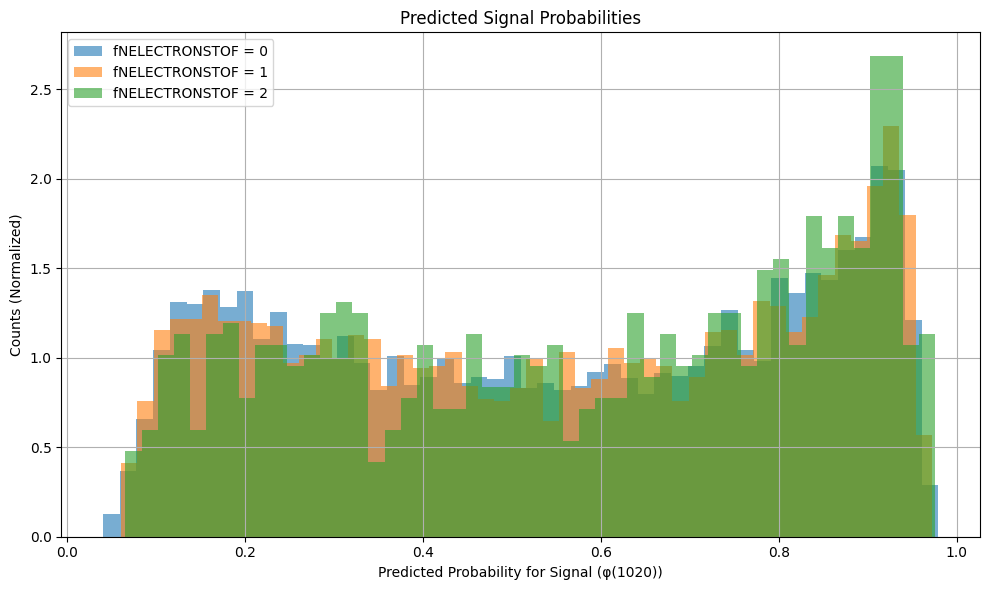

In [57]:
# Analyze predictions for signal events
analyze_phi_predictions(df_features_phi, log_reg_model, scaler)


In [68]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_phi_predictions_with_mass(phi_features_list, original_dataframes, model, scaler, threshold=0.5):
    """
    Analyzes phi predictions, filters signal-like events based on a probability threshold,
    and plots the invariant mass distributions.

    Parameters:
    phi_features_list (list): List of feature DataFrames for fNELECTRONSTOF = 0, 1, 2.
    original_dataframes (list): List of original DataFrames with 'M' column for invariant mass.
    model: Trained logistic regression model.
    scaler: Fitted MinMaxScaler used to scale the input features.
    threshold (float): Probability threshold to classify events as signal-like.
    """
    plt.figure(figsize=(10, 6))

    # Iterate through the feature DataFrames and the original DataFrames (with invariant mass)
    for i, (features_df, original_df) in enumerate(zip(phi_features_list, original_dataframes)):
        # Scale the features and predict probabilities
        X_scaled = pd.DataFrame(scaler.transform(features_df), columns=features_df.columns, index=features_df.index)
        y_pred_proba = model.predict_proba(X_scaled)[:, 1]

        # Filter events with probability above the threshold
        signal_like_mask = y_pred_proba > threshold

        # Extract corresponding invariant mass (M) values using the mask
        invariant_mass_signal = original_df.loc[signal_like_mask, "M"]

        # Plot the invariant mass distribution
        plt.hist(invariant_mass_signal, bins=50, alpha=0.6, label=f"fNELECTRONSTOF = {i}", density=True)

    # Add labels and title
    plt.xlabel("Invariant Mass (M) [GeV/c²]")
    plt.ylabel("Counts (Normalized)")
    plt.title(f"Invariant Mass Distribution for Signal-like Events (Threshold > {threshold})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


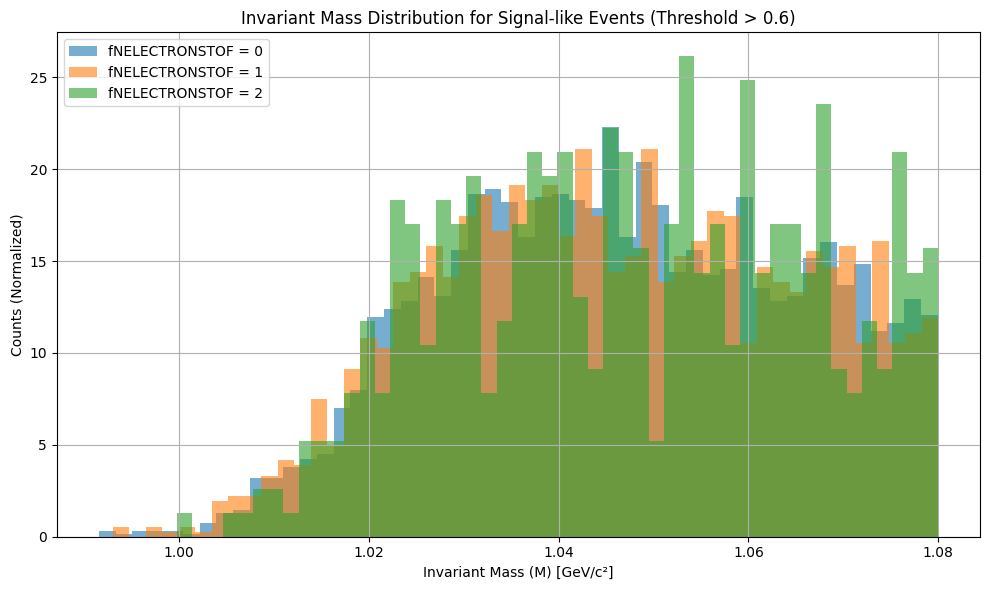

In [69]:
analyze_phi_predictions_with_mass(df_features_phi, df_filtered_phi, log_reg_model, scaler, threshold=0.6)
